In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from shapely.geometry import Point
import numpy as np

In [2]:
##zipcodes = gpd.read_file('../data/zipcodes.geojson')
#print(zipcodes.crs)
better_health = gpd.read_file('../data/Better_Health_Data_2024_release_20241202.geojson')
##print(better_health)
better_health.head()

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,...,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
0,Diagnosed diabetes among adults,11.8,%,12.0,Diabetes,United States,260836730,59,2022,12.2,...,None,Crude prevalence,None,None,Health Outcomes,CrdPrv,DIABETES,BRFSS,333287557,None
1,Hearing disability among adults,8.5,%,9.6,Hearing Disability,Alabama,19675,01005,2022,10.7,...,None,Crude prevalence,None,Barbour,Disability,CrdPrv,HEARING,BRFSS,24706,POINT (-85.39281 31.86982)
2,Stroke among adults,3.4,%,3.7,Stroke,Alabama,91336,01015,2022,4.0,...,None,Age-adjusted prevalence,None,Calhoun,Health Outcomes,AgeAdjPrv,STROKE,BRFSS,115788,POINT (-85.82577 33.77149)
3,Stroke among adults,5.1,%,5.6,Stroke,Alabama,27025,01017,2022,6.0,...,None,Crude prevalence,None,Chambers,Health Outcomes,CrdPrv,STROKE,BRFSS,34088,POINT (-85.39176 32.91417)
4,Stroke among adults,4.9,%,5.3,Stroke,Alabama,11235,01027,2022,5.7,...,None,Crude prevalence,None,Clay,Health Outcomes,CrdPrv,STROKE,BRFSS,14198,POINT (-85.86066 33.26931)


In [3]:
better_health.loc[(better_health.statedesc=='United States') & (better_health.short_question_text=='Diabetes')]

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,...,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
0,Diagnosed diabetes among adults,11.8,%,12.0,Diabetes,United States,260836730,59,2022,12.2,...,None,Crude prevalence,None,None,Health Outcomes,CrdPrv,DIABETES,BRFSS,333287557,None
5984,Diagnosed diabetes among adults,10.2,%,10.4,Diabetes,United States,260836730,59,2022,10.6,...,None,Age-adjusted prevalence,None,None,Health Outcomes,AgeAdjPrv,DIABETES,BRFSS,333287557,None


In [4]:
better_health.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
pd.set_option('display.max.columns', 22)
#pd.set_option('display.max.rows', 22)

In [6]:
better_health = better_health.loc[better_health.data_value_type=='Crude prevalence']
better_health.head()

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,categoryid,stateabbr,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
0,Diagnosed diabetes among adults,11.8,%,12.0,Diabetes,United States,260836730,59,2022,12.2,HLTHOUT,US,None,Crude prevalence,None,None,Health Outcomes,CrdPrv,DIABETES,BRFSS,333287557,None
1,Hearing disability among adults,8.5,%,9.6,Hearing Disability,Alabama,19675,01005,2022,10.7,DISABLT,AL,None,Crude prevalence,None,Barbour,Disability,CrdPrv,HEARING,BRFSS,24706,POINT (-85.39281 31.86982)
3,Stroke among adults,5.1,%,5.6,Stroke,Alabama,27025,01017,2022,6.0,HLTHOUT,AL,None,Crude prevalence,None,Chambers,Health Outcomes,CrdPrv,STROKE,BRFSS,34088,POINT (-85.39176 32.91417)
4,Stroke among adults,4.9,%,5.3,Stroke,Alabama,11235,01027,2022,5.7,HLTHOUT,AL,None,Crude prevalence,None,Clay,Health Outcomes,CrdPrv,STROKE,BRFSS,14198,POINT (-85.86066 33.26931)
6,Short sleep duration among adults,33.6,%,40.3,Short Sleep Duration,Alabama,54954,01049,2022,47.2,RISKBEH,AL,None,Crude prevalence,None,DeKalb,Health Risk Behaviors,CrdPrv,SLEEP,BRFSS,71998,POINT (-85.80397 34.45986)


In [7]:
better_health.totalpopulation = better_health.totalpopulation.astype(int)
better_health.totalpopulation

0         333287557
1             24706
3             34088
4             14198
6             71998
            ...    
240876        81172
240879       103836
240881        45709
240884       137958
240885        39472
Name: totalpopulation, Length: 120443, dtype: int64

In [8]:
better_health.columns

Index(['measure', 'low_confidence_limit', 'data_value_unit', 'data_value',
       'short_question_text', 'statedesc', 'totalpop18plus', 'locationid',
       'year', 'high_confidence_limit', 'categoryid', 'stateabbr',
       'data_value_footnote', 'data_value_type', 'data_value_footnote_symbol',
       'locationname', 'category', 'datavaluetypeid', 'measureid',
       'datasource', 'totalpopulation', 'geometry'],
      dtype='object')

In [9]:
better_health.loc[better_health.statedesc=='Delaware']['locationname']

76             Kent
18273          Kent
18420        Sussex
18704    New Castle
19173        Sussex
            ...    
35491          Kent
35552        Sussex
35751    New Castle
35774          Kent
35788        Sussex
Name: locationname, Length: 120, dtype: object

In [10]:
better_health.groupby(['statedesc','year'])['totalpopulation'].sum()

statedesc      year
Alabama        2021     20297184
               2022    182674656
Alaska         2021      2934332
               2022     26408988
Arizona        2021     29436788
                         ...    
West Virginia  2022     63905616
Wisconsin      2021     23570156
               2022    212131404
Wyoming        2021      2325524
               2022     20929716
Name: totalpopulation, Length: 103, dtype: int64

In [11]:
better_health.head()

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,categoryid,stateabbr,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
0,Diagnosed diabetes among adults,11.8,%,12.0,Diabetes,United States,260836730,59,2022,12.2,HLTHOUT,US,None,Crude prevalence,None,None,Health Outcomes,CrdPrv,DIABETES,BRFSS,333287557,None
1,Hearing disability among adults,8.5,%,9.6,Hearing Disability,Alabama,19675,01005,2022,10.7,DISABLT,AL,None,Crude prevalence,None,Barbour,Disability,CrdPrv,HEARING,BRFSS,24706,POINT (-85.39281 31.86982)
3,Stroke among adults,5.1,%,5.6,Stroke,Alabama,27025,01017,2022,6.0,HLTHOUT,AL,None,Crude prevalence,None,Chambers,Health Outcomes,CrdPrv,STROKE,BRFSS,34088,POINT (-85.39176 32.91417)
4,Stroke among adults,4.9,%,5.3,Stroke,Alabama,11235,01027,2022,5.7,HLTHOUT,AL,None,Crude prevalence,None,Clay,Health Outcomes,CrdPrv,STROKE,BRFSS,14198,POINT (-85.86066 33.26931)
6,Short sleep duration among adults,33.6,%,40.3,Short Sleep Duration,Alabama,54954,01049,2022,47.2,RISKBEH,AL,None,Crude prevalence,None,DeKalb,Health Risk Behaviors,CrdPrv,SLEEP,BRFSS,71998,POINT (-85.80397 34.45986)


In [12]:
better_health.columns

Index(['measure', 'low_confidence_limit', 'data_value_unit', 'data_value',
       'short_question_text', 'statedesc', 'totalpop18plus', 'locationid',
       'year', 'high_confidence_limit', 'categoryid', 'stateabbr',
       'data_value_footnote', 'data_value_type', 'data_value_footnote_symbol',
       'locationname', 'category', 'datavaluetypeid', 'measureid',
       'datasource', 'totalpopulation', 'geometry'],
      dtype='object')

In [13]:
better_health_df1=better_health.drop(columns =['low_confidence_limit','locationid','high_confidence_limit',
                                               'data_value_footnote','data_value_footnote_symbol', 'data_value_type', 'datavaluetypeid',
                                               'measureid', 'datasource','totalpop18plus','measure', 'data_value_unit','categoryid'])
better_health_df1.head()          


,data_value,short_question_text,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986)


In [14]:
df_USA = better_health_df1[better_health_df1.statedesc=='United States'].reset_index(drop=True)
df_USA

,data_value,short_question_text,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,13.4,Cognitive Disability,United States,2022,US,None,Disability,333287557,None
2,10.8,Health Insurance,United States,2022,US,None,Prevention,333287557,None
3,8.2,Cancer (non-skin) or Melanoma,United States,2022,US,None,Health Outcomes,333287557,None
4,23.7,Physical Inactivity,United States,2022,US,None,Health Risk Behaviors,333287557,None
5,17.9,General Health,United States,2022,US,None,Health Status,333287557,None
6,6.8,COPD,United States,2022,US,None,Health Outcomes,333287557,None
7,31.9,Social Isolation,United States,2022,US,None,Health-Related Social Needs,333287557,None
8,6.8,Coronary Heart Disease,United States,2022,US,None,Health Outcomes,333287557,None
9,35.5,High Cholesterol,United States,2021,US,None,Health Outcomes,333287557,None


In [15]:
my_list= ['Diabetes','Cognitive Disability','Cancer (non-skin) or Melanoma','Stroke','High Blood Pressure','Arthritis','Depression','Obesity']

df_USA_Categories = df_USA.loc[df_USA.short_question_text.isin(my_list)].reset_index(drop = True)
df_USA_Categories


,data_value,short_question_text,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,13.4,Cognitive Disability,United States,2022,US,None,Disability,333287557,None
2,8.2,Cancer (non-skin) or Melanoma,United States,2022,US,None,Health Outcomes,333287557,None
3,3.6,Stroke,United States,2022,US,None,Health Outcomes,333287557,None
4,32.7,High Blood Pressure,United States,2021,US,None,Health Outcomes,333287557,None
5,26.6,Arthritis,United States,2022,US,None,Health Outcomes,333287557,None
6,33.3,Obesity,United States,2022,US,None,Health Outcomes,333287557,None
7,20.7,Depression,United States,2022,US,None,Health Outcomes,333287557,None


In [16]:
type(df_USA_Categories)

geopandas.geodataframe.GeoDataFrame

In [17]:
df_USA_Categories.to_csv('../data/df_USA_Categories.csv')

In [18]:
df_USA_Categories=pd.read_csv('../data/df_USA_Categories.csv')
df_USA_Categories

,Unnamed: 0,data_value,short_question_text,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,0,12.0,Diabetes,United States,2022,US,NaN,Health Outcomes,333287557,NaN
1,1,13.4,Cognitive Disability,United States,2022,US,NaN,Disability,333287557,NaN
2,2,8.2,Cancer (non-skin) or Melanoma,United States,2022,US,NaN,Health Outcomes,333287557,NaN
3,3,3.6,Stroke,United States,2022,US,NaN,Health Outcomes,333287557,NaN
4,4,32.7,High Blood Pressure,United States,2021,US,NaN,Health Outcomes,333287557,NaN
5,5,26.6,Arthritis,United States,2022,US,NaN,Health Outcomes,333287557,NaN
6,6,33.3,Obesity,United States,2022,US,NaN,Health Outcomes,333287557,NaN
7,7,20.7,Depression,United States,2022,US,NaN,Health Outcomes,333287557,NaN


In [19]:
type(df_USA_Categories)

pandas.core.frame.DataFrame

In [20]:
df_USA_7Categories=df_USA_Categories[['data_value','short_question_text']].sort_values(by='data_value', ascending = False)
#candy_df=candy_df.rename(columns={'name':'Name', 'state':'State', '2nd_place_pounds': 'Second_place_pounds', '3rd_place_pounds':'Third_place_pounds', 'top_candy':'Top_candy', 'top_candy_pounds': 'Top_candy_pounds'})
#candy_df.head(3)
df_USA_7Categories=df_USA_7Categories.rename(columns={'data_value':'Percentage','short_question_text': 'Category'})
df_USA_7Categories

,Percentage,Category
6,33.3,Obesity
4,32.7,High Blood Pressure
5,26.6,Arthritis
7,20.7,Depression
1,13.4,Cognitive Disability
0,12.0,Diabetes
2,8.2,Cancer (non-skin) or Melanoma
3,3.6,Stroke


In [21]:
#plt.pie(category_counts['count'],labels = category_counts['lenght_category'])
#plt.title("Length Categories");

In [22]:
df_USA_7Categories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 6 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Percentage  8 non-null      float64
 1   Category    8 non-null      object 
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


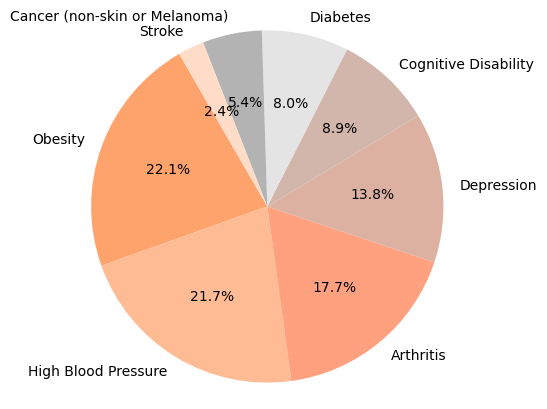

In [23]:
categories = ['Obesity', 'High Blood Pressure', 'Arthritis','Depression','Cognitive Disability', 'Diabetes', 'Cancer (non-skin or Melanoma)', 'Stroke']
Total = [33.3, 32.7, 26.6, 20.7 , 13.4, 12.0, 8.2, 3.6]
colors = ['#ffa36d','#ffbc94','#ffa17f', '#dcb1a2', '#d2b6ac', '#e4e4e4', '#b3b3b3','#ffdcc7',] 
plt.figure(figsize=(5, 5))
plt.pie(Total, labels= categories, startangle=120, colors=colors, autopct='%1.1f%%') #,autopct='%1.1f%%',# Title
#plt.title('Top Eight Chronic Diseases')# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.savefig("TPH_2324.png", transparent=True)
plt.show() #(edited) 


In [24]:
my_list2= ['Current Cigarette Smoking','Binge Drinking','Physical Inactivity']
#df_USA_7Categories=df_USA_7Categories.rename(columns={'data_value':'Percentage','short_question_text': 'Category'})
#df_USA_7Categories
df_USA_Risks = df_USA.loc[df_USA.short_question_text.isin(my_list2)].reset_index(drop = True)
df_USA_Risks=df_USA_Risks.rename(columns={'data_value':'Percentage','short_question_text': 'Category'})


In [25]:
type(df_USA_Risks)


geopandas.geodataframe.GeoDataFrame

In [26]:
df_USA_Risks.to_csv('../data/df_USA_Risks.csv')

In [27]:
df_USA_Risks=pd.read_csv('../data/df_USA_Risks.csv')
df_USA_Risks

,Unnamed: 0,Percentage,Category,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,0,23.7,Physical Inactivity,United States,2022,US,NaN,Health Risk Behaviors,333287557,NaN
1,1,12.9,Current Cigarette Smoking,United States,2022,US,NaN,Health Risk Behaviors,333287557,NaN
2,2,16.6,Binge Drinking,United States,2022,US,NaN,Health Risk Behaviors,333287557,NaN


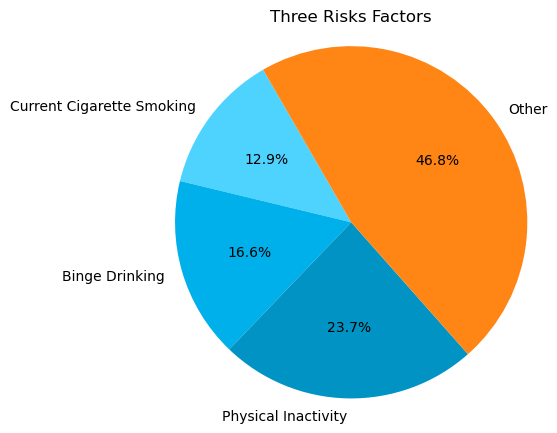

In [28]:
categories = ['Current Cigarette Smoking','Binge Drinking','Physical Inactivity','Other']
Total = [12.9, 16.6, 23.7, 46.8]
colors = ['#4ed3ff', '#00b0eb','#0093c4', '#ff8514'] #, '#d2b6ac', '#e4e4e4', '#b3b3b3','#ffdcc7',] 
plt.figure(figsize=(5, 5))
plt.pie(Total, labels= categories, startangle=120, colors=colors, autopct='%1.1f%%') #,autopct='%1.1f%%',# Title
plt.title('Three Risks Factors')# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.savefig("TPH_2324.png", transparent=True)
plt.show() #(edited) 


Select 7 specific categories that you are focused on for United States and make a graph from it..., then make graphs for each category...

In [29]:
better_health_df1['short_question_text']=better_health_df1['short_question_text'].astype(str)
better_health_df1.head(2)

,data_value,short_question_text,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)


In [30]:
type(better_health_df1)

geopandas.geodataframe.GeoDataFrame

In [31]:
better_health_df1.shape

(120443, 9)

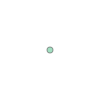

In [32]:
better_health_df1.loc[1,'geometry']

In [33]:
print(better_health_df1.loc[1, 'geometry'])

POINT (-85.3928136383141 31.8698172860413)


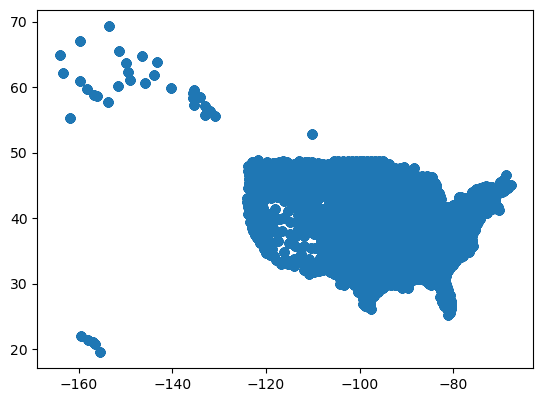

In [34]:
better_health_df1.plot();

In [35]:
better_health_df1.head()

,data_value,short_question_text,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986)


In [36]:
better_health_df1=better_health_df1.rename(columns={'measure':'Measure','data_value':'Data','short_question_text': 'Category','statedesc':'State', 'totalpop18plus': '18plus', 'year':'Year',
                                  'categoryid':'Category_ID','stateabbr': 'St_Abbr','locationname': 'Location', 'category':'Group',
                                  'totalpopulation':'Population','geometry':'Geometry'})
better_health_df1.head()


,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986)


In [37]:
better_health_df1.Category.value_counts()

Category
Diabetes                            3145
Hearing Disability                  3145
Stroke                              3145
Short Sleep Duration                3145
Cancer (non-skin) or Melanoma       3145
Frequent Physical Distress          3145
Health Insurance                    3145
Arthritis                           3145
Cognitive Disability                3145
Mobility Disability                 3145
Any Disability                      3145
Depression                          3145
Annual Checkup                      3145
Obesity                             3145
Coronary Heart Disease              3145
Current Asthma                      3145
Vision Disability                   3145
Binge Drinking                      3145
COPD                                3145
Self-care Disability                3145
Mammography                         3145
Current Cigarette Smoking           3145
Dental Visit                        3145
Independent Living Disability       3145
All Tee

In [38]:
better_health_df1['Data']=better_health_df1['Data'].astype(float)
better_health_df1.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986)


In [39]:
better_health_df1['Population']=better_health_df1['Population'].astype(int)
better_health_df1.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986)


In [40]:
better_health_df1['Total'] =((better_health_df1.Population * better_health_df1.Data)/100).astype('int')
better_health_df1.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None,39994506
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982),2371
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417),1908
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931),752
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986),29015


In [41]:
better_health_df1_Stroke = better_health_df1.loc[better_health_df1['Category'] == 'Stroke'].reset_index(drop=True).round()
better_health_df1_Stroke.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,6.0,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417),1908
1,5.0,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931),752
2,4.0,Stroke,Arkansas,2022,AR,Crawford,Health Outcomes,61075,POINT (-94.24242 35.58843),2748
3,6.0,Stroke,Arkansas,2022,AR,Monroe,Health Outcomes,6564,POINT (-91.20392 34.67785),420
4,4.0,Stroke,California,2022,CA,Inyo,Health Outcomes,18718,POINT (-117.41111 36.51142),730


In [42]:
better_health_df1_Stroke.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Data        3145 non-null   float64 
 1   Category    3145 non-null   object  
 2   State       3145 non-null   object  
 3   Year        3145 non-null   object  
 4   St_Abbr     3145 non-null   object  
 5   Location    3144 non-null   object  
 6   Group       3145 non-null   object  
 7   Population  3145 non-null   int64   
 8   Geometry    3144 non-null   geometry
 9   Total       3145 non-null   int64   
dtypes: float64(1), geometry(1), int64(2), object(6)
memory usage: 245.8+ KB


In [43]:
#candy_df['Name']=candy_df['Name'].astype(str)
#candy_df.head()
#better_health_df1_Stroke['Data']=better_health_df1_Stroke['Data'].astype(float)
better_health_df1_Stroke_TN = better_health_df1_Stroke.loc[better_health_df1_Stroke.State=='Tennessee'].reset_index(drop = True)
better_health_df1_Stroke_TN.head(5)

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,5.0,Stroke,Tennessee,2022,TN,Bledsoe,Health Outcomes,14798,POINT (-85.20485 35.59673),784
1,5.0,Stroke,Tennessee,2022,TN,Carroll,Health Outcomes,28458,POINT (-88.45022 35.97313),1337
2,5.0,Stroke,Tennessee,2022,TN,Rhea,Health Outcomes,33730,POINT (-84.92436 35.60898),1753
3,4.0,Stroke,Tennessee,2022,TN,Franklin,Health Outcomes,43942,POINT (-86.09187 35.15495),1933
4,5.0,Stroke,Tennessee,2022,TN,Johnson,Health Outcomes,18086,POINT (-81.85198 36.45455),940


In [44]:
#better_health_df1_Stroke['Population']=better_health_df1_Stroke['Population'].astype(int)
#better_health_df1_Stroke.head(2)

In [45]:
better_health_df1_Stroke.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Data        3145 non-null   float64 
 1   Category    3145 non-null   object  
 2   State       3145 non-null   object  
 3   Year        3145 non-null   object  
 4   St_Abbr     3145 non-null   object  
 5   Location    3144 non-null   object  
 6   Group       3145 non-null   object  
 7   Population  3145 non-null   int64   
 8   Geometry    3144 non-null   geometry
 9   Total       3145 non-null   int64   
dtypes: float64(1), geometry(1), int64(2), object(6)
memory usage: 245.8+ KB


In [46]:
Stroke=better_health_df1_Stroke[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0) #.head(11)
Stroke.head(10)


,State,Total
1,California,1226481
2,Texas,1000176
3,Florida,912508
4,New York,661298
5,Pennsylvania,475785
6,Ohio,450266
7,Illinois,426399
8,Georgia,408217
9,North Carolina,403943
10,Michigan,368265


In [47]:
better_health_df1_Stroke[better_health_df1_Stroke.State =='United States']

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
149,4.0,Stroke,United States,2022,US,None,Health Outcomes,333287557,None,11998352


In [48]:
#Stroke.head(10).plot.bar(x= 'State', y='Total', color=['lightgreen'])
#plt.title('Stroke Top 10 States')
#plt.ylabel ('Total') 
#plt.ticklabel_format(style='plain', axis='y')
              

Note for myslelf: Let's look at heart disease as well

In [49]:
Cancer = better_health_df1.loc[better_health_df1['Category'] == 'Cancer (non-skin) or Melanoma'].reset_index(drop=True).round()
Cancer.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,9.0,Cancer (non-skin) or Melanoma,Alabama,2022,AL,Etowah,Health Outcomes,103088,POINT (-86.03493 34.04514),9381
1,9.0,Cancer (non-skin) or Melanoma,Arkansas,2022,AR,Saline,Health Outcomes,127357,POINT (-92.67652 34.64665),11716
2,8.0,Cancer (non-skin) or Melanoma,Alabama,2022,AL,Mobile,Health Outcomes,411411,POINT (-88.20641 30.77917),31678
3,6.0,Cancer (non-skin) or Melanoma,California,2022,CA,Los Angeles,Health Outcomes,9721138,POINT (-118.22455 34.32138),583268
4,8.0,Cancer (non-skin) or Melanoma,Alabama,2022,AL,Dale,Health Outcomes,49544,POINT (-85.61093 31.43166),4112


In [50]:
Cancer = Cancer[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0).head(11)
Cancer.head(10)    


,State,Total
1,California,2630957
2,Florida,2041029
3,Texas,1888815
4,New York,1472875
5,Pennsylvania,1138401
6,Ohio,1020081
7,Illinois,956855
8,Michigan,869942
9,North Carolina,835275
10,Georgia,784263


In [51]:
better_health_df1_Diabetes = better_health_df1.loc[better_health_df1['Category'] =='Diabetes'].reset_index(drop=True)
better_health_df1_Diabetes.head(11)

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None,39994506
1,17.5,Diabetes,Alabama,2022,AL,Russell,Health Outcomes,58555,POINT (-85.18466 32.28821),10247
2,15.3,Diabetes,Arkansas,2022,AR,Drew,Health Outcomes,16911,POINT (-91.71966 33.58941),2587
3,15.8,Diabetes,Georgia,2022,GA,Burke,Health Outcomes,24388,POINT (-82.00069 33.06134),3853
4,13.7,Diabetes,Georgia,2022,GA,Glascock,Health Outcomes,2939,POINT (-82.61063 33.22973),402
5,10.2,Diabetes,Illinois,2022,IL,Monroe,Health Outcomes,35033,POINT (-90.17751 38.27839),3573
6,14.5,Diabetes,Alabama,2022,AL,Calhoun,Health Outcomes,115788,POINT (-85.82577 33.77149),16789
7,11.7,Diabetes,Iowa,2022,IA,Clay,Health Outcomes,16475,POINT (-95.15112 43.08257),1927
8,9.9,Diabetes,Arizona,2022,AZ,Coconino,Health Outcomes,144060,POINT (-111.77058 35.83879),14261
9,21.4,Diabetes,Alabama,2022,AL,Dallas,Health Outcomes,36767,POINT (-87.10652 32.32583),7868


In [52]:
better_health_df1_Diabetes[better_health_df1_Diabetes.State == "United States"]

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None,39994506


In [53]:
Diabetes = better_health_df1_Diabetes[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0).head(10)
Diabetes.head(10)   


,State,Total
1,California,4484266
2,Texas,4096814
3,Florida,2964747
4,New York,2191458
5,Ohio,1577087
6,Pennsylvania,1500161
7,Illinois,1480750
8,Georgia,1374933
9,North Carolina,1280957
10,Michigan,1134922


In [54]:
better_health_df1_Obesity = better_health_df1.loc[better_health_df1['Category'] == 'Obesity'].reset_index(drop=True).round()
better_health_df1_Obesity.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,38.0,Obesity,Arkansas,2022,AR,Columbia,Health Outcomes,22216,POINT (-93.22753 33.21441),8553
1,29.0,Obesity,California,2022,CA,Contra Costa,Health Outcomes,1156966,POINT (-121.92733 37.91920),330892
2,25.0,Obesity,California,2022,CA,El Dorado,Health Outcomes,192646,POINT (-120.52458 38.77869),47583
3,27.0,Obesity,California,2022,CA,San Luis Obispo,Health Outcomes,282013,POINT (-120.40448 35.38711),75015
4,31.0,Obesity,Florida,2022,FL,Hillsborough,Health Outcomes,1513301,POINT (-82.30859 27.92930),475176


In [55]:
Obesity = better_health_df1_Obesity[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0).head(10)
Obesity.head(11)   


,State,Total
1,California,11035112
2,Texas,10976012
3,Florida,7181692
4,New York,5898962
5,Ohio,4587535
6,Pennsylvania,4389838
7,Illinois,4313891
8,Georgia,4014053
9,North Carolina,3576877
10,Michigan,3554036


In [56]:
#Obesity.plot.bar(x= 'State', y='Total', color=['lightgreen'])
#plt.title('Obesity Top 10 States')
#plt.ylabel ('Total') 
#plt.ticklabel_format(style='plain', axis='y')

In [57]:
better_health_df1_Arthritis = better_health_df1.loc[better_health_df1['Category'] == 'Arthritis'].reset_index(drop=True).round()
better_health_df1_Arthritis.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,28.0,Arthritis,Alabama,2022,AL,Lee,Health Outcomes,180773,POINT (-85.35504 32.60125),50616
1,39.0,Arthritis,Alabama,2022,AL,Marion,Health Outcomes,29156,POINT (-87.88720 34.13659),11341
2,30.0,Arthritis,Arizona,2022,AZ,Cochise,Health Outcomes,125663,POINT (-109.75138 31.87946),37573
3,38.0,Arthritis,Arkansas,2022,AR,Polk,Health Outcomes,19337,POINT (-94.22822 34.48586),7270
4,40.0,Arthritis,Arkansas,2022,AR,Searcy,Health Outcomes,7918,POINT (-92.69949 35.91113),3175


In [58]:
Arthritis = better_health_df1_Arthritis[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0).head(10)
Arthritis.head(11)   

,State,Total
1,California,8522106
2,Texas,6805605
3,Florida,6293809
4,New York,4677113
5,Pennsylvania,3945048
6,Ohio,3618675
7,Illinois,3267651
8,Michigan,2988790
9,Georgia,2885754
10,North Carolina,2858639


In [59]:
better_health_df1_Depression = better_health_df1.loc[better_health_df1['Category'] == 'Depression'].reset_index(drop=True).round()
better_health_df1_Depression.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,19.0,Depression,Alaska,2022,AK,Yakutat,Health Outcomes,700,POINT (-140.35766 59.88901),130
1,22.0,Depression,Arizona,2022,AZ,Mohave,Health Outcomes,220816,POINT (-113.75810 35.70447),49021
2,26.0,Depression,Arkansas,2022,AR,Carroll,Health Outcomes,28742,POINT (-93.53830 36.34096),7472
3,23.0,Depression,California,2022,CA,Mendocino,Health Outcomes,89783,POINT (-123.39132 39.44031),20739
4,20.0,Depression,California,2022,CA,San Benito,Health Outcomes,67579,POINT (-121.07467 36.60543),13583


In [60]:
Depression = better_health_df1_Depression[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0).head(10)
Depression.head(11) 

,State,Total
1,California,8030499
2,Texas,6545857
3,Florida,4314403
4,New York,3682820
5,Ohio,2985520
6,Pennsylvania,2985296
7,North Carolina,2409927
8,Michigan,2408741
9,Illinois,2384346
10,Georgia,2223313


In [61]:
better_health_df1_population_by_State = better_health_df1[['State','Population','Location']].drop_duplicates() 
better_health_df1_population_by_State


,State,Population,Location
0,United States,333287557,None
1,Alabama,24706,Barbour
3,Alabama,34088,Chambers
4,Alabama,14198,Clay
6,Alabama,71998,DeKalb
...,...,...,...
233917,Wisconsin,105380,Walworth
233956,Wyoming,13786,Converse
234053,Wyoming,30518,Park
234071,Wisconsin,96017,St. Croix


In [62]:

better_health_df1_population_by_State=better_health_df1_population_by_State[['State','Population']].groupby('State')['Population'].sum().to_frame().sort_values(by='Population', ascending = False).reset_index()
better_health_df1_population_by_State.head()


,State,Population
0,United States,333287557
1,California,39029342
2,Texas,30029572
3,Florida,22244823
4,New York,19677151


In [63]:
##better_health_df1_percentage.sort_values(by='State', ascending = False) .reset_index()

In [64]:
combined_pd_Stroke = pd.merge(better_health_df1_population_by_State, Stroke,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Stroke.head()


,State,Population,Total
0,California,39029342,1226481
1,Texas,30029572,1000176
2,Florida,22244823,912508
3,New York,19677151,661298
4,Pennsylvania,12972008,475785


In [65]:
combined_pd_Stroke['Per_capita'] = (combined_pd_Stroke.Total/combined_pd_Stroke.Population) 
combined_pd_Stroke
combined_pd_Stroke.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Stroke.head()

,State,Population,Total,Per_capita
0,California,39029342,1226481,0.031425
1,Texas,30029572,1000176,0.033306
2,Florida,22244823,912508,0.041021
3,New York,19677151,661298,0.033607
4,Pennsylvania,12972008,475785,0.036678


In [66]:
combined_pd_Stroke['State Total']=round((combined_pd_Stroke.Total/combined_pd_Stroke.Population)*100000,2)
combined_pd_Stroke= combined_pd_Stroke.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Stroke.head(10)

,State,Population,Total,Per_capita,State Total
0,Mississippi,2940057,137409,0.046737,4673.68
1,Louisiana,4590241,204770,0.044610,4460.99
2,West Virginia,1775156,79184,0.044607,4460.68
3,Alabama,5074296,215914,0.042551,4255.05
4,Arkansas,3045637,129431,0.042497,4249.72
5,Florida,22244823,912508,0.041021,4102.11
6,Oklahoma,4019800,161093,0.040075,4007.49
7,Kentucky,4512310,180016,0.039894,3989.44
8,South Carolina,5282634,208004,0.039375,3937.51
9,New Mexico,2113344,82624,0.039096,3909.63


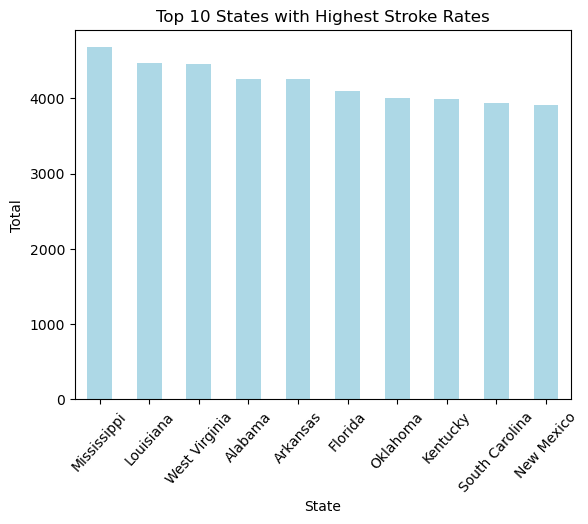

In [67]:
combined_pd_Stroke.head(10).plot.bar(x= 'State', y='State Total', color=['lightblue'], legend=False)
plt.title('Top 10 States with Highest Stroke Rates')
plt.xticks(rotation = 48)
plt.ylabel ('Total') 
plt.ticklabel_format(style='plain', axis='y')

              

In [68]:
combined_pd_Cancer = pd.merge(better_health_df1_population_by_State, Cancer,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Cancer


,State,Population,Total
0,California,39029342,2630957
1,Texas,30029572,1888815
2,Florida,22244823,2041029
3,New York,19677151,1472875
4,Pennsylvania,12972008,1138401
5,Illinois,12582032,956855
6,Ohio,11756058,1020081
7,Georgia,10912876,784263
8,North Carolina,10698973,835275
9,Michigan,10034113,869942


In [69]:
combined_pd_Cancer['Per_capita'] = (combined_pd_Cancer.Total/combined_pd_Cancer.Population) 
combined_pd_Cancer
combined_pd_Cancer.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)

,State,Population,Total,Per_capita
0,Florida,22244823,2041029,0.091753
1,Pennsylvania,12972008,1138401,0.087758
2,Ohio,11756058,1020081,0.086771
3,Michigan,10034113,869942,0.086698
4,North Carolina,10698973,835275,0.078071
5,New Jersey,9261699,706081,0.076237
6,Illinois,12582032,956855,0.076049
7,New York,19677151,1472875,0.074852
8,Georgia,10912876,784263,0.071866
9,California,39029342,2630957,0.067410


In [70]:
combined_pd_Cancer['State Total']=round((combined_pd_Cancer.Total/combined_pd_Cancer.Population)*100000,2)
combined_pd_Cancer= combined_pd_Cancer.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Cancer

,State,Population,Total,Per_capita,State Total
0,Florida,22244823,2041029,0.091753,9175.30
1,Pennsylvania,12972008,1138401,0.087758,8775.83
2,Ohio,11756058,1020081,0.086771,8677.07
3,Michigan,10034113,869942,0.086698,8669.84
4,North Carolina,10698973,835275,0.078071,7807.06
5,New Jersey,9261699,706081,0.076237,7623.67
6,Illinois,12582032,956855,0.076049,7604.93
7,New York,19677151,1472875,0.074852,7485.20
8,Georgia,10912876,784263,0.071866,7186.58
9,California,39029342,2630957,0.067410,6740.97


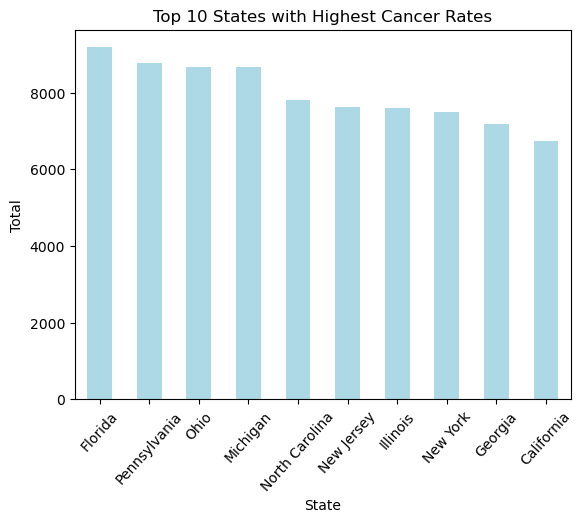

In [71]:
combined_pd_Cancer.head(10).plot.bar(x= 'State', y='State Total', color=['lightblue'], legend=False  )
plt.title('Top 10 States with Highest Cancer Rates')
plt.ylabel ('Total') 
plt.xticks(rotation = 48)
plt.ticklabel_format(style='plain', axis='y')
 

In [72]:
combined_pd_Cancer

,State,Population,Total,Per_capita,State Total
0,Florida,22244823,2041029,0.091753,9175.30
1,Pennsylvania,12972008,1138401,0.087758,8775.83
2,Ohio,11756058,1020081,0.086771,8677.07
3,Michigan,10034113,869942,0.086698,8669.84
4,North Carolina,10698973,835275,0.078071,7807.06
5,New Jersey,9261699,706081,0.076237,7623.67
6,Illinois,12582032,956855,0.076049,7604.93
7,New York,19677151,1472875,0.074852,7485.20
8,Georgia,10912876,784263,0.071866,7186.58
9,California,39029342,2630957,0.067410,6740.97


In [73]:
combined_pd_Diabetes = pd.merge(better_health_df1_population_by_State, Diabetes,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Diabetes


,State,Population,Total
0,California,39029342,4484266
1,Texas,30029572,4096814
2,Florida,22244823,2964747
3,New York,19677151,2191458
4,Pennsylvania,12972008,1500161
5,Illinois,12582032,1480750
6,Ohio,11756058,1577087
7,Georgia,10912876,1374933
8,North Carolina,10698973,1280957
9,Michigan,10034113,1134922


In [74]:
combined_pd_Diabetes['Per_capita'] = (combined_pd_Diabetes.Total/combined_pd_Diabetes.Population) 
combined_pd_Diabetes
combined_pd_Diabetes.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)

,State,Population,Total,Per_capita
0,Texas,30029572,4096814,0.136426
1,Ohio,11756058,1577087,0.134151
2,Florida,22244823,2964747,0.133278
3,Georgia,10912876,1374933,0.125992
4,North Carolina,10698973,1280957,0.119727
5,Illinois,12582032,1480750,0.117688
6,Pennsylvania,12972008,1500161,0.115646
7,California,39029342,4484266,0.114895
8,Michigan,10034113,1134922,0.113106
9,New York,19677151,2191458,0.111371


In [75]:
combined_pd_Diabetes['State Total']=round((combined_pd_Diabetes.Total/combined_pd_Diabetes.Population)*100000,2)
combined_pd_Diabetes= combined_pd_Diabetes.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Diabetes.head(10)

,State,Population,Total,Per_capita,State Total
0,Texas,30029572,4096814,0.136426,13642.60
1,Ohio,11756058,1577087,0.134151,13415.10
2,Florida,22244823,2964747,0.133278,13327.81
3,Georgia,10912876,1374933,0.125992,12599.18
4,North Carolina,10698973,1280957,0.119727,11972.71
5,Illinois,12582032,1480750,0.117688,11768.77
6,Pennsylvania,12972008,1500161,0.115646,11564.60
7,California,39029342,4484266,0.114895,11489.47
8,Michigan,10034113,1134922,0.113106,11310.64
9,New York,19677151,2191458,0.111371,11137.07


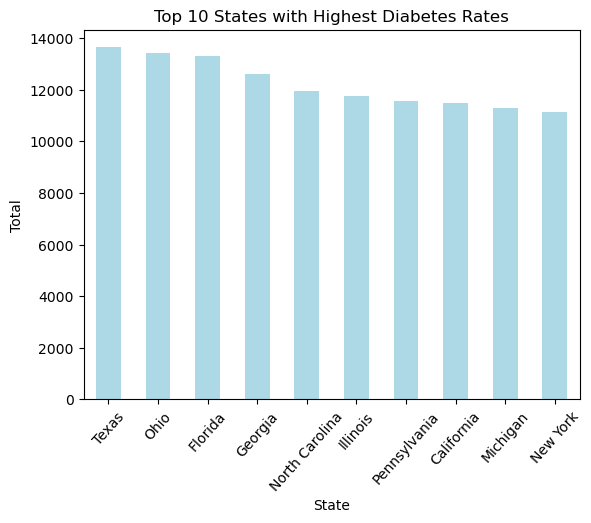

In [76]:
combined_pd_Diabetes.head(10).plot.bar(x= 'State', y='State Total', color=['lightblue'], legend=False)
plt.title('Top 10 States with Highest Diabetes Rates')
plt.ylabel ('Total') 
plt.xticks(rotation = 48)
plt.ticklabel_format(style='plain', axis='y')
              

In [77]:
combined_pd_Obesity = pd.merge(better_health_df1_population_by_State, Obesity,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Obesity

,State,Population,Total
0,California,39029342,11035112
1,Texas,30029572,10976012
2,Florida,22244823,7181692
3,New York,19677151,5898962
4,Pennsylvania,12972008,4389838
5,Illinois,12582032,4313891
6,Ohio,11756058,4587535
7,Georgia,10912876,4014053
8,North Carolina,10698973,3576877
9,Michigan,10034113,3554036


In [78]:
combined_pd_Obesity['Per_capita'] = (combined_pd_Obesity.Total/combined_pd_Obesity.Population) 
combined_pd_Obesity
combined_pd_Obesity.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)

,State,Population,Total,Per_capita
0,Ohio,11756058,4587535,0.390227
1,Georgia,10912876,4014053,0.367827
2,Texas,30029572,10976012,0.365507
3,Michigan,10034113,3554036,0.354195
4,Illinois,12582032,4313891,0.342861
5,Pennsylvania,12972008,4389838,0.338409
6,North Carolina,10698973,3576877,0.334320
7,Florida,22244823,7181692,0.322848
8,New York,19677151,5898962,0.299787
9,California,39029342,11035112,0.282739


In [79]:
combined_pd_Obesity['State Total']=round((combined_pd_Obesity.Total/combined_pd_Obesity.Population)*100000,2)
combined_pd_Obesity= combined_pd_Obesity.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Obesity.head(10)

,State,Population,Total,Per_capita,State Total
0,Ohio,11756058,4587535,0.390227,39022.73
1,Georgia,10912876,4014053,0.367827,36782.72
2,Texas,30029572,10976012,0.365507,36550.68
3,Michigan,10034113,3554036,0.354195,35419.53
4,Illinois,12582032,4313891,0.342861,34286.12
5,Pennsylvania,12972008,4389838,0.338409,33840.85
6,North Carolina,10698973,3576877,0.334320,33431.97
7,Florida,22244823,7181692,0.322848,32284.78
8,New York,19677151,5898962,0.299787,29978.74
9,California,39029342,11035112,0.282739,28273.89


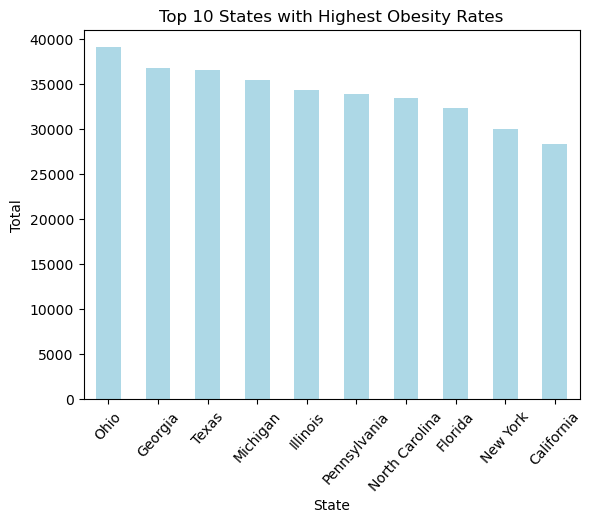

In [80]:
combined_pd_Obesity.head(10).plot.bar(x= 'State', y='State Total', color=['lightblue'], legend=False)
plt.title('Top 10 States with Highest Obesity Rates')
plt.ylabel ('Total') 
plt.xticks(rotation = 48)
plt.ticklabel_format(style='plain', axis='y')
              

In [81]:
combined_pd_Arthritis = pd.merge(better_health_df1_population_by_State, Arthritis,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Arthritis

,State,Population,Total
0,California,39029342,8522106
1,Texas,30029572,6805605
2,Florida,22244823,6293809
3,New York,19677151,4677113
4,Pennsylvania,12972008,3945048
5,Illinois,12582032,3267651
6,Ohio,11756058,3618675
7,Georgia,10912876,2885754
8,North Carolina,10698973,2858639
9,Michigan,10034113,2988790


In [82]:
combined_pd_Arthritis['Per_capita'] = (combined_pd_Arthritis.Total/combined_pd_Arthritis.Population) 
combined_pd_Arthritis
combined_pd_Arthritis.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)

,State,Population,Total,Per_capita
0,Ohio,11756058,3618675,0.307814
1,Pennsylvania,12972008,3945048,0.304120
2,Michigan,10034113,2988790,0.297863
3,Florida,22244823,6293809,0.282934
4,North Carolina,10698973,2858639,0.267188
5,Georgia,10912876,2885754,0.264436
6,Illinois,12582032,3267651,0.259708
7,New York,19677151,4677113,0.237693
8,Texas,30029572,6805605,0.226630
9,California,39029342,8522106,0.218351


In [83]:
combined_pd_Arthritis['State Total']=round((combined_pd_Arthritis.Total/combined_pd_Arthritis.Population)*100000,2)
combined_pd_Arthritis= combined_pd_Arthritis.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Arthritis.head(10)

,State,Population,Total,Per_capita,State Total
0,Ohio,11756058,3618675,0.307814,30781.36
1,Pennsylvania,12972008,3945048,0.304120,30412.01
2,Michigan,10034113,2988790,0.297863,29786.29
3,Florida,22244823,6293809,0.282934,28293.37
4,North Carolina,10698973,2858639,0.267188,26718.82
5,Georgia,10912876,2885754,0.264436,26443.57
6,Illinois,12582032,3267651,0.259708,25970.77
7,New York,19677151,4677113,0.237693,23769.26
8,Texas,30029572,6805605,0.226630,22663.01
9,California,39029342,8522106,0.218351,21835.13


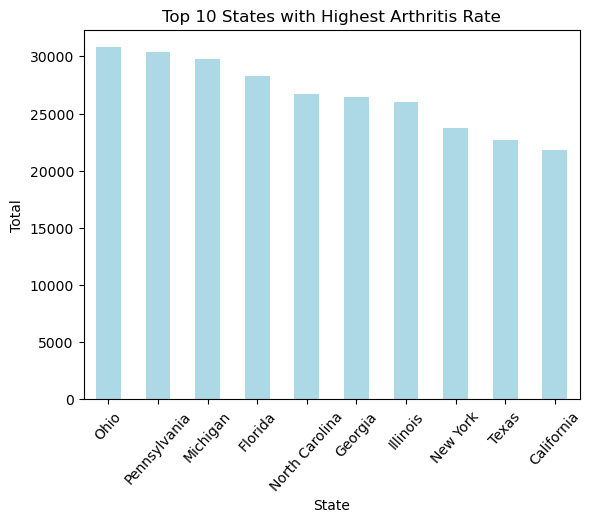

In [84]:
combined_pd_Arthritis.head(10).plot.bar(x= 'State', y='State Total', color=['lightblue'],legend=False)
plt.title('Top 10 States with Highest Arthritis Rate')
plt.ylabel ('Total') 
plt.xticks(rotation = 48)
plt.ticklabel_format(style='plain', axis='y')
              

In [85]:
combined_pd_Arthritis = pd.merge(better_health_df1_population_by_State, Arthritis,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Arthritis

,State,Population,Total
0,California,39029342,8522106
1,Texas,30029572,6805605
2,Florida,22244823,6293809
3,New York,19677151,4677113
4,Pennsylvania,12972008,3945048
5,Illinois,12582032,3267651
6,Ohio,11756058,3618675
7,Georgia,10912876,2885754
8,North Carolina,10698973,2858639
9,Michigan,10034113,2988790


In [86]:
Cognitive_Disability = better_health_df1.loc[better_health_df1['Category'] == 'Cognitive Disability'].reset_index(drop=True).round()
Cognitive_Disability.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,19.0,Cognitive Disability,Alabama,2022,AL,Lowndes,Disability,9777,POINT (-86.65006 32.15503),1886
1,22.0,Cognitive Disability,Arkansas,2022,AR,Lee,Disability,8364,POINT (-90.78057 34.78067),1806
2,15.0,Cognitive Disability,California,2022,CA,Lake,Disability,68191,POINT (-122.75341 39.09999),10092
3,14.0,Cognitive Disability,Arizona,2022,AZ,Yavapai,Disability,246191,POINT (-112.55364 34.59970),35697
4,18.0,Cognitive Disability,Alabama,2022,AL,Butler,Disability,18650,POINT (-86.68045 31.75260),3357


In [87]:
Cognitive_Disability=Cognitive_Disability[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0) #.head(11)
Cognitive_Disability.head(10)


,State,Total
1,California,5415066
2,Texas,4710013
3,Florida,3261678
4,New York,2318039
5,Ohio,1830421
6,Pennsylvania,1828713
7,Illinois,1571690
8,Georgia,1539991
9,North Carolina,1522061
10,Michigan,1377023


In [88]:
combined_pd_Cognitive_Disability= pd.merge(better_health_df1_population_by_State, Cognitive_Disability,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Cognitive_Disability.head(10)

,State,Population,Total
0,California,39029342,5415066
1,Texas,30029572,4710013
2,Florida,22244823,3261678
3,New York,19677151,2318039
4,Pennsylvania,12972008,1828713
5,Illinois,12582032,1571690
6,Ohio,11756058,1830421
7,Georgia,10912876,1539991
8,North Carolina,10698973,1522061
9,Michigan,10034113,1377023


In [89]:
combined_pd_Cognitive_Disability['Per_capita'] = (combined_pd_Cognitive_Disability.Total/combined_pd_Cognitive_Disability.Population) 
combined_pd_Cognitive_Disability
combined_pd_Cognitive_Disability.sort_values(by="Per_capita", ascending = False).reset_index(drop = True).head(10)

,State,Population,Total,Per_capita
0,West Virginia,1775156,327264,0.184358
1,Louisiana,4590241,845470,0.184189
2,Oklahoma,4019800,736159,0.183133
3,Arkansas,3045637,534810,0.175599
4,Kentucky,4512310,779244,0.172693
5,Mississippi,2940057,499111,0.169762
6,Tennessee,7051339,1188431,0.168540
7,Alabama,5074296,822568,0.162105
8,New Mexico,2113344,336566,0.159258
9,Missouri,6177957,979681,0.158577


In [90]:
combined_pd_Cognitive_Disability['State Total']=round((combined_pd_Cognitive_Disability.Total/combined_pd_Cognitive_Disability.Population)*100000,2)
combined_pd_Cognitive_Disability= combined_pd_Cognitive_Disability.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Cognitive_Disability.head(10)

,State,Population,Total,Per_capita,State Total
0,West Virginia,1775156,327264,0.184358,18435.79
1,Louisiana,4590241,845470,0.184189,18418.86
2,Oklahoma,4019800,736159,0.183133,18313.32
3,Arkansas,3045637,534810,0.175599,17559.87
4,Kentucky,4512310,779244,0.172693,17269.29
5,Mississippi,2940057,499111,0.169762,16976.24
6,Tennessee,7051339,1188431,0.168540,16853.98
7,Alabama,5074296,822568,0.162105,16210.49
8,New Mexico,2113344,336566,0.159258,15925.76
9,Missouri,6177957,979681,0.158577,15857.69


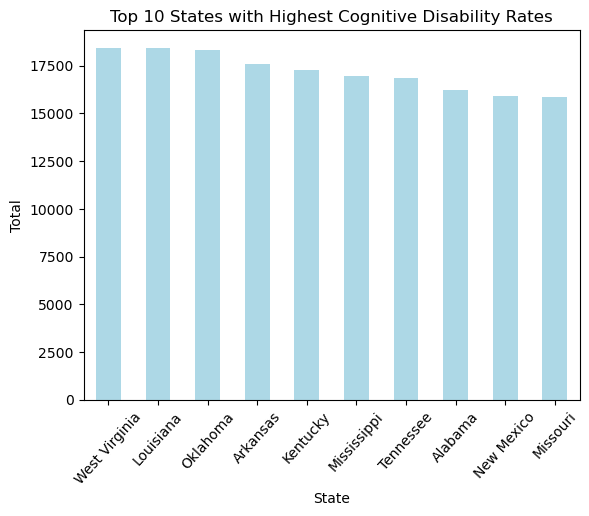

In [91]:
combined_pd_Cognitive_Disability.head(10).plot.bar(x= 'State', y='State Total', color=['lightblue'], legend=False)
plt.title('Top 10 States with Highest Cognitive Disability Rates')
plt.ylabel ('Total') 
plt.xticks(rotation = 48)

plt.ticklabel_format(style='plain', axis='y')
            

In [92]:
combined_pd_Depression= pd.merge(better_health_df1_population_by_State, Depression,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Depression.head(10)

,State,Population,Total
0,California,39029342,8030499
1,Texas,30029572,6545857
2,Florida,22244823,4314403
3,New York,19677151,3682820
4,Pennsylvania,12972008,2985296
5,Illinois,12582032,2384346
6,Ohio,11756058,2985520
7,Georgia,10912876,2223313
8,North Carolina,10698973,2409927
9,Michigan,10034113,2408741


In [93]:
combined_pd_Depression['Per_capita'] = (combined_pd_Depression.Total/combined_pd_Depression.Population) 
combined_pd_Depression
combined_pd_Depression.sort_values(by="Per_capita", ascending = False).reset_index(drop = True).head(10)

,State,Population,Total,Per_capita
0,Ohio,11756058,2985520,0.253956
1,Michigan,10034113,2408741,0.240055
2,Pennsylvania,12972008,2985296,0.230134
3,North Carolina,10698973,2409927,0.225248
4,Texas,30029572,6545857,0.217980
5,California,39029342,8030499,0.205755
6,Georgia,10912876,2223313,0.203733
7,Florida,22244823,4314403,0.193951
8,Illinois,12582032,2384346,0.189504
9,New York,19677151,3682820,0.187162


In [94]:
combined_pd_Depression['State Total']=round((combined_pd_Depression.Total/combined_pd_Depression.Population)*100000,2)
combined_pd_Depression= combined_pd_Depression.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Depression.head(10)

,State,Population,Total,Per_capita,State Total
0,Ohio,11756058,2985520,0.253956,25395.59
1,Michigan,10034113,2408741,0.240055,24005.52
2,Pennsylvania,12972008,2985296,0.230134,23013.37
3,North Carolina,10698973,2409927,0.225248,22524.84
4,Texas,30029572,6545857,0.217980,21798.04
5,California,39029342,8030499,0.205755,20575.54
6,Georgia,10912876,2223313,0.203733,20373.30
7,Florida,22244823,4314403,0.193951,19395.09
8,Illinois,12582032,2384346,0.189504,18950.40
9,New York,19677151,3682820,0.187162,18716.23


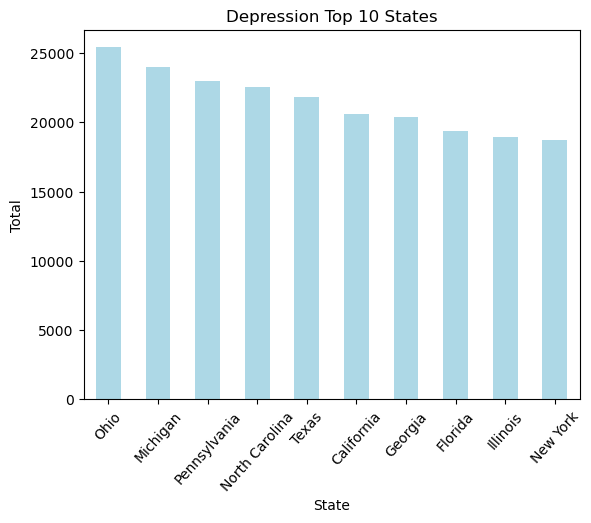

In [95]:
combined_pd_Depression.head(10).plot.bar(x= 'State', y='State Total', color=['lightblue'], legend=False)
plt.title('Depression Top 10 States')
plt.ylabel ('Total') 
plt.xticks(rotation = 48)
plt.ticklabel_format(style='plain', axis='y')

In [96]:
High_Blood_Pressure = better_health_df1.loc[better_health_df1['Category'] == 'High Blood Pressure'].reset_index(drop=True).round()
High_Blood_Pressure.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,35.0,High Blood Pressure,Alaska,2021,AK,Yakutat,Health Outcomes,700,POINT (-140.35766 59.88901),246
1,45.0,High Blood Pressure,Arkansas,2021,AR,Newton,Health Outcomes,7078,POINT (-93.21756 35.92010),3185
2,41.0,High Blood Pressure,Arkansas,2021,AR,White,Health Outcomes,77755,POINT (-91.74548 35.25609),32035
3,32.0,High Blood Pressure,California,2021,CA,Shasta,Health Outcomes,180930,POINT (-122.04025 40.76379),58078
4,47.0,High Blood Pressure,Arkansas,2021,AR,Marion,Health Outcomes,17254,POINT (-92.68451 36.26865),8057


In [97]:
High_Blood_Pressure=High_Blood_Pressure[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0) #.head(11)
High_Blood_Pressure.head(10)

,State,Total
1,California,11081550
2,Texas,9806826
3,New York,6157261
4,Pennsylvania,4258462
5,Ohio,4239388
6,Georgia,4085867
7,Illinois,4003674
8,North Carolina,3739814
9,Michigan,3534853
10,Virginia,2956192


In [98]:
combined_pd_High_Blood_Pressure= pd.merge(better_health_df1_population_by_State, High_Blood_Pressure,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_High_Blood_Pressure.head(10)

,State,Population,Total
0,California,39029342,11081550
1,Texas,30029572,9806826
2,New York,19677151,6157261
3,Pennsylvania,12972008,4258462
4,Illinois,12582032,4003674
5,Ohio,11756058,4239388
6,Georgia,10912876,4085867
7,North Carolina,10698973,3739814
8,Michigan,10034113,3534853
9,New Jersey,9261699,2867614


In [99]:
combined_pd_High_Blood_Pressure['Per_capita'] = (combined_pd_High_Blood_Pressure.Total/combined_pd_High_Blood_Pressure.Population) 
combined_pd_High_Blood_Pressure
combined_pd_High_Blood_Pressure.sort_values(by="Per_capita", ascending = False).reset_index(drop = True).head(10)

,State,Population,Total,Per_capita
0,Mississippi,2940057,1296873,0.441105
1,West Virginia,1775156,754477,0.425020
2,Alabama,5074296,2084103,0.410718
3,Louisiana,4590241,1829945,0.398660
4,Arkansas,3045637,1212220,0.398019
5,Kentucky,4512310,1751335,0.388124
6,South Carolina,5282634,1994969,0.377647
7,Tennessee,7051339,2653650,0.376333
8,Oklahoma,4019800,1512178,0.376182
9,Georgia,10912876,4085867,0.374408


In [100]:
combined_pd_High_Blood_Pressure['State Total']=round((combined_pd_High_Blood_Pressure.Total/combined_pd_High_Blood_Pressure.Population)*100000,2)
combined_pd_High_Blood_Pressure= combined_pd_High_Blood_Pressure.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_High_Blood_Pressure.head(10)

,State,Population,Total,Per_capita,State Total
0,Mississippi,2940057,1296873,0.441105,44110.47
1,West Virginia,1775156,754477,0.425020,42502.01
2,Alabama,5074296,2084103,0.410718,41071.77
3,Louisiana,4590241,1829945,0.398660,39865.99
4,Arkansas,3045637,1212220,0.398019,39801.85
5,Kentucky,4512310,1751335,0.388124,38812.38
6,South Carolina,5282634,1994969,0.377647,37764.66
7,Tennessee,7051339,2653650,0.376333,37633.28
8,Oklahoma,4019800,1512178,0.376182,37618.24
9,Georgia,10912876,4085867,0.374408,37440.79


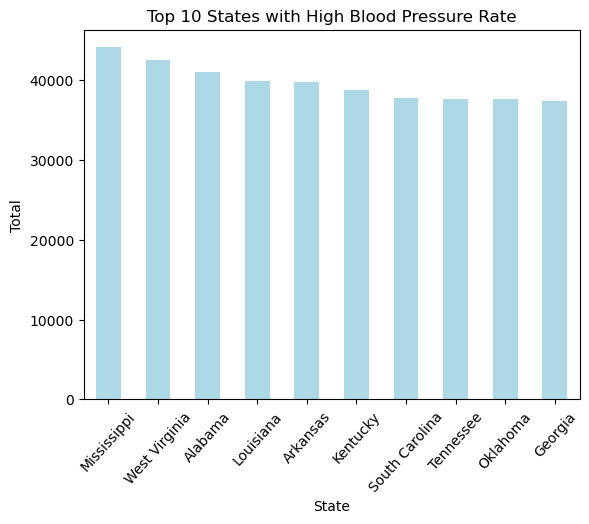

In [101]:
combined_pd_High_Blood_Pressure.head(10).plot.bar(x= 'State', y='State Total', color=['lightblue'], legend=False)
plt.title('Top 10 States with High Blood Pressure Rate')
plt.ylabel ('Total') 
plt.xticks(rotation = 48)
plt.ticklabel_format(style='plain', axis='y')
            

In [102]:
#better_health_df1_percentage.groupby('State')['Population'].sum().to_frame().sort_values(by='State', ascending = False).reset_index().drop(0)


Some of the 3 factors: Cigarette smoking,Physical inactivity,Excessive alcohol use


In [103]:
Current_Cigarette_Smoking = better_health_df1.loc[better_health_df1['Category'] == 'Current Cigarette Smoking'].reset_index(drop=True).round()
Current_Cigarette_Smoking.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,25.0,Current Cigarette Smoking,Arkansas,2022,AR,Fulton,Health Risk Behaviors,12382,POINT (-91.81789 36.38162),3107
1,19.0,Current Cigarette Smoking,Arkansas,2022,AR,Sebastian,Health Risk Behaviors,129059,POINT (-94.27471 35.19945),24392
2,21.0,Current Cigarette Smoking,Arkansas,2022,AR,Yell,Health Risk Behaviors,20129,POINT (-93.41031 35.00278),4227
3,15.0,Current Cigarette Smoking,Arizona,2022,AZ,Graham,Health Risk Behaviors,38779,POINT (-109.88740 32.93276),5894
4,24.0,Current Cigarette Smoking,Arkansas,2022,AR,Phillips,Health Risk Behaviors,15304,POINT (-90.84869 34.42766),3611


In [104]:
Current_Cigarette_Smoking=Current_Cigarette_Smoking[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0) #.head(11)
Current_Cigarette_Smoking.head(10)

,State,Total
1,California,4396283
2,Texas,4361569
3,Florida,3035472
4,New York,2403890
5,Ohio,2104681
6,Pennsylvania,2043617
7,Illinois,1671777
8,Michigan,1610464
9,Georgia,1581503
10,North Carolina,1525349


In [105]:
combined_pd_Current_Cigarette_Smoking= pd.merge(better_health_df1_population_by_State, Current_Cigarette_Smoking,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Current_Cigarette_Smoking.head(10)

,State,Population,Total
0,California,39029342,4396283
1,Texas,30029572,4361569
2,Florida,22244823,3035472
3,New York,19677151,2403890
4,Pennsylvania,12972008,2043617
5,Illinois,12582032,1671777
6,Ohio,11756058,2104681
7,Georgia,10912876,1581503
8,North Carolina,10698973,1525349
9,Michigan,10034113,1610464


In [106]:
combined_pd_Current_Cigarette_Smoking['Per_capita'] = (combined_pd_Current_Cigarette_Smoking.Total/combined_pd_Current_Cigarette_Smoking.Population) 
combined_pd_Current_Cigarette_Smoking
combined_pd_Current_Cigarette_Smoking.sort_values(by="Per_capita", ascending = False).reset_index(drop = True).head(10)

,State,Population,Total,Per_capita
0,West Virginia,1775156,358028,0.201688
1,Tennessee,7051339,1344392,0.190658
2,Louisiana,4590241,858173,0.186956
3,Arkansas,3045637,563348,0.184969
4,Kentucky,4512310,833982,0.184824
5,Mississippi,2940057,535001,0.181970
6,Missouri,6177957,1108470,0.179423
7,Ohio,11756058,2104681,0.179029
8,Indiana,6833037,1192115,0.174463
9,Oklahoma,4019800,684864,0.170373


In [107]:
combined_pd_Current_Cigarette_Smoking['State Total']=round((combined_pd_Current_Cigarette_Smoking.Total/combined_pd_Current_Cigarette_Smoking.Population)*100000,2)
combined_pd_Current_Cigarette_Smoking= combined_pd_Current_Cigarette_Smoking.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Current_Cigarette_Smoking.head(10)

,State,Population,Total,Per_capita,State Total
0,West Virginia,1775156,358028,0.201688,20168.82
1,Tennessee,7051339,1344392,0.190658,19065.77
2,Louisiana,4590241,858173,0.186956,18695.60
3,Arkansas,3045637,563348,0.184969,18496.89
4,Kentucky,4512310,833982,0.184824,18482.37
5,Mississippi,2940057,535001,0.181970,18196.96
6,Missouri,6177957,1108470,0.179423,17942.34
7,Ohio,11756058,2104681,0.179029,17902.95
8,Indiana,6833037,1192115,0.174463,17446.34
9,Oklahoma,4019800,684864,0.170373,17037.27


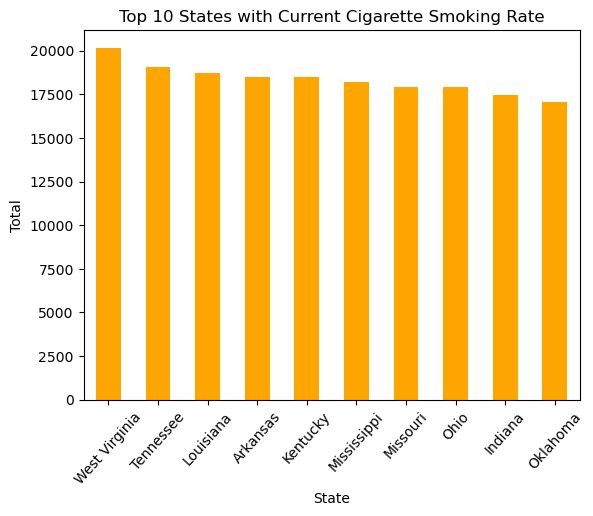

In [108]:
combined_pd_Current_Cigarette_Smoking.head(10).plot.bar(x= 'State', y='State Total', color=['orange'], legend=False)
plt.title('Top 10 States with Current Cigarette Smoking Rate')
plt.ylabel ('Total') 
plt.xticks(rotation = 48)
plt.ticklabel_format(style='plain', axis='y')
            

In [109]:
Physical_Inactivity = better_health_df1.loc[better_health_df1['Category'] == 'Physical Inactivity'].reset_index(drop=True).round()
Physical_Inactivity.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,25.0,Physical Inactivity,Alabama,2022,AL,Baldwin,Health Risk Behaviors,246435,POINT (-87.72262 30.72775),62594
1,31.0,Physical Inactivity,Arizona,2022,AZ,Mohave,Health Risk Behaviors,220816,POINT (-113.75810 35.70447),68673
2,23.0,Physical Inactivity,California,2022,CA,Mendocino,Health Risk Behaviors,89783,POINT (-123.39132 39.44031),20290
3,21.0,Physical Inactivity,Alaska,2022,AK,Chugach,Health Risk Behaviors,6874,POINT (-145.84667 60.71481),1436
4,28.0,Physical Inactivity,California,2022,CA,Del Norte,Health Risk Behaviors,27082,POINT (-123.89712 41.74316),7582


In [110]:
Physical_Inactivity=Physical_Inactivity[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0) #.head(11)
Physical_Inactivity.head(10)


,State,Total
1,California,8737681
2,Texas,8252496
3,Florida,5859877
4,New York,4935574
5,Pennsylvania,3087743
6,Ohio,3082723
7,Illinois,2802576
8,Georgia,2776015
9,North Carolina,2426213
10,Michigan,2395455


In [111]:
combined_pd_Physical_Inactivity= pd.merge(better_health_df1_population_by_State, Physical_Inactivity,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Physical_Inactivity.head(10)

,State,Population,Total
0,California,39029342,8737681
1,Texas,30029572,8252496
2,Florida,22244823,5859877
3,New York,19677151,4935574
4,Pennsylvania,12972008,3087743
5,Illinois,12582032,2802576
6,Ohio,11756058,3082723
7,Georgia,10912876,2776015
8,North Carolina,10698973,2426213
9,Michigan,10034113,2395455


In [112]:
combined_pd_Physical_Inactivity['Per_capita'] = (combined_pd_Physical_Inactivity.Total/combined_pd_Physical_Inactivity.Population) 
combined_pd_Physical_Inactivity
combined_pd_Physical_Inactivity.sort_values(by="Per_capita", ascending = False).reset_index(drop = True).head(10)

,State,Population,Total,Per_capita
0,Mississippi,2940057,950029,0.323133
1,West Virginia,1775156,559052,0.314931
2,Arkansas,3045637,944234,0.310028
3,Oklahoma,4019800,1208608,0.300664
4,Louisiana,4590241,1379573,0.300545
5,Alabama,5074296,1452707,0.286287
6,Tennessee,7051339,1985345,0.281556
7,Indiana,6833037,1904215,0.278678
8,Texas,30029572,8252496,0.274812
9,Kentucky,4512310,1212051,0.268610


In [113]:
combined_pd_Physical_Inactivity['State Total']=round((combined_pd_Physical_Inactivity.Total/combined_pd_Physical_Inactivity.Population)*100000,2)
combined_pd_Physical_Inactivity= combined_pd_Physical_Inactivity.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Physical_Inactivity.head(10)

,State,Population,Total,Per_capita,State Total
0,Mississippi,2940057,950029,0.323133,32313.29
1,West Virginia,1775156,559052,0.314931,31493.12
2,Arkansas,3045637,944234,0.310028,31002.84
3,Oklahoma,4019800,1208608,0.300664,30066.37
4,Louisiana,4590241,1379573,0.300545,30054.48
5,Alabama,5074296,1452707,0.286287,28628.74
6,Tennessee,7051339,1985345,0.281556,28155.57
7,Indiana,6833037,1904215,0.278678,27867.77
8,Texas,30029572,8252496,0.274812,27481.23
9,Kentucky,4512310,1212051,0.268610,26860.99


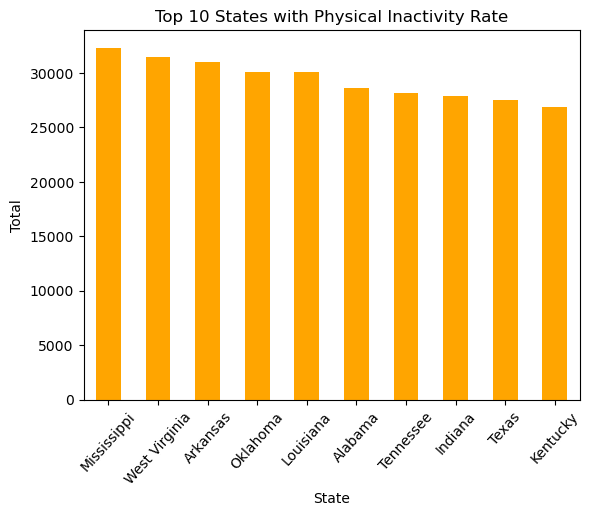

In [114]:
combined_pd_Physical_Inactivity.head(10).plot.bar(x= 'State', y='State Total', color=['orange'], legend=False)
plt.title('Top 10 States with Physical Inactivity Rate')
plt.ylabel ('Total') 
plt.xticks(rotation = 48)
plt.ticklabel_format(style='plain', axis='y')

Binge Drinking

In [115]:
Binge_Drinking1 = better_health_df1.loc[better_health_df1['Category'] == 'Binge Drinking'].reset_index(drop=True).round()
Binge_Drinking1.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,16.0,Binge Drinking,California,2022,CA,Sierra,Health Risk Behaviors,3217,POINT (-120.51647 39.58029),514
1,20.0,Binge Drinking,Alaska,2022,AK,Anchorage,Health Risk Behaviors,287145,POINT (-149.11255 61.15048),55993
2,19.0,Binge Drinking,California,2022,CA,Shasta,Health Risk Behaviors,180930,POINT (-122.04025 40.76379),33652
3,16.0,Binge Drinking,Alabama,2022,AL,Cullman,Health Risk Behaviors,90665,POINT (-86.86746 34.13212),14234
4,19.0,Binge Drinking,Idaho,2022,ID,Latah,Health Risk Behaviors,40978,POINT (-116.71170 46.81557),7826


In [116]:
Binge_Drinking=Binge_Drinking1[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0) #.head(11)
Binge_Drinking.head(10)


,State,Total
1,California,7072872
2,Texas,5303525
3,Florida,3585439
4,New York,3480270
5,Illinois,2409678
6,Pennsylvania,2372538
7,Ohio,2124873
8,North Carolina,1821770
9,Michigan,1769505
10,Georgia,1664358


In [117]:
combined_pd_Binge_Drinking= pd.merge(better_health_df1_population_by_State, Binge_Drinking,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_Binge_Drinking.head(10)


,State,Population,Total
0,California,39029342,7072872
1,Texas,30029572,5303525
2,Florida,22244823,3585439
3,New York,19677151,3480270
4,Pennsylvania,12972008,2372538
5,Illinois,12582032,2409678
6,Ohio,11756058,2124873
7,Georgia,10912876,1664358
8,North Carolina,10698973,1821770
9,Michigan,10034113,1769505


In [118]:
combined_pd_Binge_Drinking['Per_capita'] = (combined_pd_Binge_Drinking.Total/combined_pd_Binge_Drinking.Population) 
combined_pd_Binge_Drinking
combined_pd_Binge_Drinking.sort_values(by="Per_capita", ascending = False).reset_index(drop = True).head(10)

,State,Population,Total,Per_capita
0,District of Columbia,671803,165263,0.245999
1,North Dakota,779261,171861,0.220544
2,Iowa,3200517,695006,0.217154
3,Montana,1122867,242670,0.216116
4,Wisconsin,5892539,1258363,0.213552
5,Minnesota,5717184,1167886,0.204276
6,Colorado,5839926,1165779,0.199622
7,South Dakota,909824,181283,0.199251
8,Alaska,733583,141519,0.192915
9,Nebraska,1967923,379245,0.192713


In [119]:
combined_pd_Binge_Drinking['State Total']=round((combined_pd_Binge_Drinking.Total/combined_pd_Binge_Drinking.Population)*100000,2)
combined_pd_Binge_Drinking= combined_pd_Binge_Drinking.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Binge_Drinking.head()

,State,Population,Total,Per_capita,State Total
0,District of Columbia,671803,165263,0.245999,24599.92
1,North Dakota,779261,171861,0.220544,22054.36
2,Iowa,3200517,695006,0.217154,21715.43
3,Montana,1122867,242670,0.216116,21611.64
4,Wisconsin,5892539,1258363,0.213552,21355.19


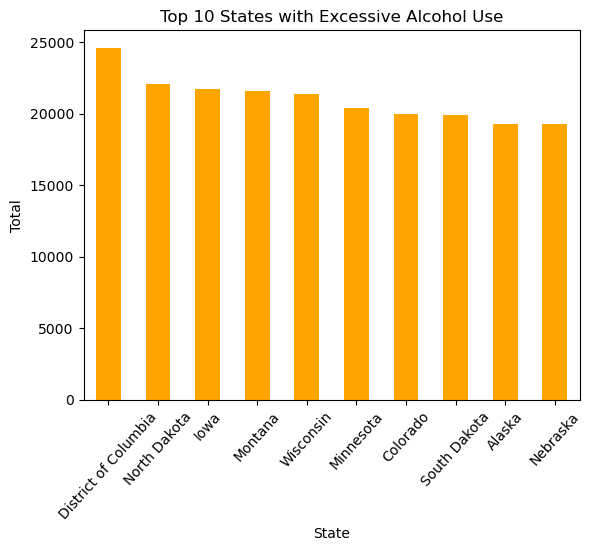

In [120]:
combined_pd_Binge_Drinking.head(10).plot.bar(x= 'State', y='State Total', color=['orange'], legend=False)
plt.title('Top 10 States with Excessive Alcohol Use')
plt.ylabel ('Total') 
plt.xticks(rotation = 48)
plt.ticklabel_format(style='plain', axis='y')

In [121]:
better_health_df1.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None,39994506
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982),2371
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417),1908
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931),752
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986),29015


In [122]:
combined_pd_Binge_Drinking.head()

,State,Population,Total,Per_capita,State Total
0,District of Columbia,671803,165263,0.245999,24599.92
1,North Dakota,779261,171861,0.220544,22054.36
2,Iowa,3200517,695006,0.217154,21715.43
3,Montana,1122867,242670,0.216116,21611.64
4,Wisconsin,5892539,1258363,0.213552,21355.19


In [123]:
Binge_Drinking2Test=combined_pd_Binge_Drinking
Binge_Drinking2Test.head(2)

,State,Population,Total,Per_capita,State Total
0,District of Columbia,671803,165263,0.245999,24599.92
1,North Dakota,779261,171861,0.220544,22054.36


In [124]:
Binge_Drinking2Test.to_csv('../data/Binge_Drinking2Test.csv')

In [125]:
BH=better_health_df1.drop(0).reset_index(drop = True)
BH_drinking = BH.loc[BH['Category']=='Binge Drinking'].reset_index(drop=True).round()
BH_drinking=BH_drinking[['State', 'Total', 'Geometry']]
BH_drinking.head()

,State,Total,Geometry
0,California,514,POINT (-120.51647 39.58029)
1,Alaska,55993,POINT (-149.11255 61.15048)
2,California,33652,POINT (-122.04025 40.76379)
3,Alabama,14234,POINT (-86.86746 34.13212)
4,Idaho,7826,POINT (-116.71170 46.81557)


In [126]:
type(BH_drinking)

geopandas.geodataframe.GeoDataFrame

In [127]:
BH_drinking.head()

,State,Total,Geometry
0,California,514,POINT (-120.51647 39.58029)
1,Alaska,55993,POINT (-149.11255 61.15048)
2,California,33652,POINT (-122.04025 40.76379)
3,Alabama,14234,POINT (-86.86746 34.13212)
4,Idaho,7826,POINT (-116.71170 46.81557)


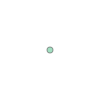

In [128]:
BH_drinking.loc[0, 'Geometry']

In [129]:
print(BH_drinking.loc[0, 'Geometry'])

POINT (-120.516466065629 39.5802928882158)


In [130]:
#BH_drinking.plot();

In [131]:
BH_drinking.columns

Index(['State', 'Total', 'Geometry'], dtype='object')

In [132]:
#chicago.plot(column="POP2010");
#BH_drinking.plot(columns=(['State', 'Total', 'Geometry'])

In [133]:
Binge_Drinking1Test=Binge_Drinking1.groupby('State')['Total'].sum().to_frame().reset_index().drop(44).reset_index(drop=True)
Binge_Drinking1Test=Binge_Drinking1Test.drop(44).reset_index(drop=True)
Binge_Drinking1Test.head()

,State,Total
0,Alabama,731707
1,Alaska,141519
2,Arizona,1260144
3,Arkansas,491750
4,California,7072872


In [134]:
type(Binge_Drinking1Test)

pandas.core.frame.DataFrame

In [135]:
#Trash_missed_by_Zip_Code.to_csv('../data/Trash_missed_by_Zip_Code.csv')
Binge_Drinking1Test.to_csv('../data/Binge_Drinking1Test.csv')

In [136]:
#Trash_by_Zip_Codes = pd.read_csv('../data/Trash_missed_by_Zip_Code.csv')
##print(Trash_by.crs)
#Trash_by_Zip_Codes.head( )
Binge_Drinking1Test= pd.read_csv('../data/Binge_Drinking1Test.csv')
Binge_Drinking1Test.head()

,Unnamed: 0,State,Total
0,0,Alabama,731707
1,1,Alaska,141519
2,2,Arizona,1260144
3,3,Arkansas,491750
4,4,California,7072872


In [137]:
#BH_drinking.to_csv('../data/BH_drinking.geojson')

In [138]:
#zipcodes = gpd.read_file('../data/zipcodes.geojson')
#print(zipcodes.crs)
#zipcodes.head( )
#BH_drinking= gpd.read_file('../data/BH_drinking.geojson')
#BH_drinking

In [139]:
BH_drinking=BH_drinking[['State','Total','Geometry']]
BH_drinking

,State,Total,Geometry
0,California,514,POINT (-120.51647 39.58029)
1,Alaska,55993,POINT (-149.11255 61.15048)
2,California,33652,POINT (-122.04025 40.76379)
3,Alabama,14234,POINT (-86.86746 34.13212)
4,Idaho,7826,POINT (-116.71170 46.81557)
...,...,...,...
3140,Wisconsin,2745,POINT (-91.75438 44.37979)
3141,Wisconsin,4154,POINT (-90.50146 45.21145)
3142,Wisconsin,25807,POINT (-87.94533 43.72125)
3143,Wyoming,1211,POINT (-107.68261 43.90446)


In [140]:
type(BH_drinking)

geopandas.geodataframe.GeoDataFrame

In [141]:
firsttry= pd.merge(left = BH_drinking, right = Binge_Drinking, 
                   left_on = 'State', right_on = 'State')
firsttry=firsttry[['State','Total_x', 'Geometry']]
firsttry

,State,Total_x,Geometry
0,California,514,POINT (-120.51647 39.58029)
1,Alaska,55993,POINT (-149.11255 61.15048)
2,California,33652,POINT (-122.04025 40.76379)
3,Alabama,14234,POINT (-86.86746 34.13212)
4,Idaho,7826,POINT (-116.71170 46.81557)
...,...,...,...
3139,Wisconsin,2745,POINT (-91.75438 44.37979)
3140,Wisconsin,4154,POINT (-90.50146 45.21145)
3141,Wisconsin,25807,POINT (-87.94533 43.72125)
3142,Wyoming,1211,POINT (-107.68261 43.90446)


In [142]:
type(firsttry)

geopandas.geodataframe.GeoDataFrame

In [143]:
#firsttry.plot()
area_center=print(firsttry.loc[0,'Geometry'])
#area_center = [center.y, center.x]
# check the order of area_center, the location for our folium map
print(area_center)

POINT (-120.516466065629 39.5802928882158)
None


In [144]:
#map_37207 = folium.Map(location =  area_center, zoom_start = 12)
#map_37207

In [145]:
#map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_firsttry=folium.Map(location = area_center, zoom_start = 12)
map_firsttry

In [146]:
firsttry #.State.value_counts()
firsttry

,State,Total_x,Geometry
0,California,514,POINT (-120.51647 39.58029)
1,Alaska,55993,POINT (-149.11255 61.15048)
2,California,33652,POINT (-122.04025 40.76379)
3,Alabama,14234,POINT (-86.86746 34.13212)
4,Idaho,7826,POINT (-116.71170 46.81557)
...,...,...,...
3139,Wisconsin,2745,POINT (-91.75438 44.37979)
3140,Wisconsin,4154,POINT (-90.50146 45.21145)
3141,Wisconsin,25807,POINT (-87.94533 43.72125)
3142,Wyoming,1211,POINT (-107.68261 43.90446)


In [147]:
first=firsttry.State.value_counts()
first

State
Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Alabama                  67
Pennsylvania             67
Florida                  67
South Dakota             66
Colorado                 64
Louisiana                64
New York                 62
California               58
Montana                  56
West Virginia            55
North Dakota             53
South Carolina           46
Idaho                    44
Washington               39
Oregon                   36
New Mexico               33
Alaska        

In [148]:
i = 0
for row_index, row_values in firsttry.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
State                                       California
Total_x                                            514
Geometry    POINT (-120.516466065629 39.5802928882158)
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
State                                          Alaska
Total_x                                         55993
Geometry    POINT (-149.112545841578 61.150482370682)
Name: 1, dtype: object
------------------------- 
index is 2
values are:
 
State                                      California
Total_x                                         33652
Geometry    POINT (-122.040246599392 40.763787981335)
Name: 2, dtype: object
------------------------- 


In [149]:
better_health_df1.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None,39994506
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982),2371
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417),1908
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931),752
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986),29015


In [150]:
type(better_health_df1)


geopandas.geodataframe.GeoDataFrame

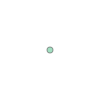

In [151]:
better_health_df1

better_health_df2=better_health_df1.loc[1,'Geometry']
better_health_df2

In [152]:
type(better_health_df2)

shapely.geometry.point.Point

In [153]:

try1=pd.merge(left = BH_drinking, right = better_health_df1, 
                   left_on = 'State', right_on = 'State')
try1=firsttry[['State','Total_x', 'Geometry']]
try1


,State,Total_x,Geometry
0,California,514,POINT (-120.51647 39.58029)
1,Alaska,55993,POINT (-149.11255 61.15048)
2,California,33652,POINT (-122.04025 40.76379)
3,Alabama,14234,POINT (-86.86746 34.13212)
4,Idaho,7826,POINT (-116.71170 46.81557)
...,...,...,...
3139,Wisconsin,2745,POINT (-91.75438 44.37979)
3140,Wisconsin,4154,POINT (-90.50146 45.21145)
3141,Wisconsin,25807,POINT (-87.94533 43.72125)
3142,Wyoming,1211,POINT (-107.68261 43.90446)


In [154]:
type(try1)

geopandas.geodataframe.GeoDataFrame

Q2: - Looking at Excel Spredsheet for NHE

In [155]:

nhe_df = pd.read_csv('../data/Table_1_NHE.csv')
nhe_df.head()

,"Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,Item,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amount in Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
nhe_df.columns

Index(['Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'U

In [157]:
type(nhe_df)

pandas.core.frame.DataFrame

In [158]:
nhe_df.reset_index

<bound method DataFrame.reset_index of    Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022  \
0                                                Item                                                                                                            
1                                                 NaN                                                                                                            
2                       National Health Expenditures                                                                                                             
3                     Health Consumption Expenditures                                                                                                            
4                                Personal Health Care                                                                                                  

In [159]:
nhe_df.columns

Index(['Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'U

In [160]:
   
nhe_df1 = nhe_df.drop(columns=['Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
                              'Unnamed: 36','Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42','Unnamed: 43',
                              'Unnamed: 44','Unnamed: 45', 'Unnamed: 46','Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
                              'Unnamed: 52','Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59',
                              'Unnamed: 60'])

nhe_df1.head()
    

,"Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Item,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,NaN,Amount in Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6",...,"$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0",...,"2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8",...,"2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"


In [161]:

nhe_df1=nhe_df1.rename(columns ={'Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022': 'NHE',
       'Unnamed: 1': '1960', 'Unnamed: 2': '1970', 'Unnamed: 3': '1980','Unnamed: 4': '1990', 'Unnamed: 5':'2000',
       'Unnamed: 6':'2001', 'Unnamed: 7':'2002', 'Unnamed: 8':'2003', 'Unnamed: 9':'2004', 'Unnamed: 10':'2005',
       'Unnamed: 11':'2006', 'Unnamed: 12':'2007', 'Unnamed: 13':'2008', 'Unnamed: 14':'2009',
       'Unnamed: 15':'2010', 'Unnamed: 16':'2011', 'Unnamed: 17': '2012', 'Unnamed: 18':'2013',
       'Unnamed: 19':'2014', 'Unnamed: 20':'2015', 'Unnamed: 21':'2016', 'Unnamed: 22':'2017',
       'Unnamed: 23':'2018', 'Unnamed: 24':'2019', 'Unnamed: 25':'2020', 'Unnamed: 26':'2021',
       'Unnamed: 27':'2022'})
nhe_df1.head()


,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Item,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,NaN,Amount in Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6",...,"$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0",...,"2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8",...,"2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"


In [162]:
nhe_df1 = nhe_df1.dropna()
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Item,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6",...,"$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0",...,"2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8",...,"2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,...,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6


In [163]:
#df = df.drop([0, 2])
#df.drop(1, inplace=True)
#df.dropna()
#df.drop(1)  # for 1 row

In [164]:
nhe_df1=nhe_df1.drop(0)
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6",...,"$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0",...,"2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8",...,"2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,...,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,...,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [165]:
##candy_df['Name']=candy_df['Name'].astype(str)
##candy_df.head()
nhe_df1 = nhe_df1.astype(str)
nhe_df1.head()


,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6",...,"$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0",...,"2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8",...,"2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,...,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,...,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [166]:
nhe_df1.shape

(21, 28)

In [167]:
type(nhe_df1)

pandas.core.frame.DataFrame

In [168]:
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6",...,"$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0",...,"2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8",...,"2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,...,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,...,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [169]:
##pd.set_option('display.max.columns',30)
#df
pd.set_option('display.max.columns', 28)
pd.set_option('display.max.rows', 22)


In [170]:
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6","$2,165.1","$2,305.5","$2,402.4","$2,492.7","$2,589.6","$2,676.5","$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0","2,032.1","2,159.3","2,246.1","2,345.5","2,437.5","2,517.8","2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8","1,806.5","1,921.5","2,007.2","2,105.5","2,180.5","2,253.9","2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,164.8,171.9,167.4,165.9,181.4,189.5,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,60.9,66.0,71.6,74.2,75.7,74.4,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [171]:
##df.reset_index(drop=True, inplace=True)

nhe_df1 = nhe_df1.reset_index(drop=True)
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6","$2,165.1","$2,305.5","$2,402.4","$2,492.7","$2,589.6","$2,676.5","$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
1,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0","2,032.1","2,159.3","2,246.1","2,345.5","2,437.5","2,517.8","2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
2,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8","1,806.5","1,921.5","2,007.2","2,105.5","2,180.5","2,253.9","2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
3,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,164.8,171.9,167.4,165.9,181.4,189.5,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
4,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,60.9,66.0,71.6,74.2,75.7,74.4,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [172]:
#Get rid off min. in duration column and change into integer
##movies_df['duration']=movies_df.duration.str[:-4].astype(int)

nhe_df1['1960']= nhe_df1['1960'].str.replace('$', '')
nhe_df1['1960']= nhe_df1['1960'].str.replace('%', '')
#nhe_df1['1960'] = nhe_df1['1960'].astype(str)


In [173]:
nhe_df1['1970']= nhe_df1['1970'].str.replace('$', '')
nhe_df1['1970']= nhe_df1['1970'].str.replace('%', '')
##nhe_df1['1970'] = nhe_df1['1970'].astype(int)

In [174]:
nhe_df1['1980']= nhe_df1['1980'].str.replace('$', '')
nhe_df1['1980']= nhe_df1['1980'].str.replace('%', '')

In [175]:
nhe_df1['1990']= nhe_df1['1990'].str.replace('$', '')
nhe_df1['1990']= nhe_df1['1990'].str.replace('%', '')

In [176]:
nhe_df1['2000']= nhe_df1['2000'].str.replace('$', '')
nhe_df1['2000']= nhe_df1['2000'].str.replace('%', '')

In [177]:
nhe_df1['2001']= nhe_df1['2001'].str.replace('$', '')
nhe_df1['2001']= nhe_df1['2001'].str.replace('%', '')

In [178]:
nhe_df1['2002']= nhe_df1['2002'].str.replace('$', '')
nhe_df1['2002']= nhe_df1['2002'].str.replace('%', '')

In [179]:
nhe_df1['2003']= nhe_df1['2003'].str.replace('$', '')
nhe_df1['2003']= nhe_df1['2003'].str.replace('%', '')

In [180]:
nhe_df1['2004']= nhe_df1['2004'].str.replace('$', '')
nhe_df1['2004']= nhe_df1['2004'].str.replace('%', '')

In [181]:
nhe_df1['2005']= nhe_df1['2005'].str.replace('$', '')
nhe_df1['2005']= nhe_df1['2005'].str.replace('%', '')

In [182]:
nhe_df1['2006']= nhe_df1['2006'].str.replace('$', '')
nhe_df1['2006']= nhe_df1['2006'].str.replace('%', '')

In [183]:
nhe_df1['2007']= nhe_df1['2007'].str.replace('$', '')
nhe_df1['2007']= nhe_df1['2007'].str.replace('%', '')

In [184]:
nhe_df1['2008']= nhe_df1['2008'].str.replace('$', '')
nhe_df1['2008']= nhe_df1['2008'].str.replace('%', '')

In [185]:
nhe_df1['2009']= nhe_df1['2009'].str.replace('$', '')
nhe_df1['2009']= nhe_df1['2009'].str.replace('%', '')

In [186]:
nhe_df1['2010']= nhe_df1['2010'].str.replace('$', '')
nhe_df1['2010']= nhe_df1['2010'].str.replace('%', '')

In [187]:
nhe_df1['2011']= nhe_df1['2011'].str.replace('$', '')
nhe_df1['2011']= nhe_df1['2011'].str.replace('%', '')

In [188]:
nhe_df1['2012']= nhe_df1['2012'].str.replace('$', '')
nhe_df1['2012']= nhe_df1['2012'].str.replace('%', '')

In [189]:
nhe_df1['2013']= nhe_df1['2013'].str.replace('$', '')
nhe_df1['2013']= nhe_df1['2013'].str.replace('%', '')

In [190]:
nhe_df1['2014']= nhe_df1['2014'].str.replace('$', '')
nhe_df1['2014']= nhe_df1['2014'].str.replace('%', '')

In [191]:
nhe_df1['2015']= nhe_df1['2015'].str.replace('$', '')
nhe_df1['2015']= nhe_df1['2015'].str.replace('%', '')

In [192]:
nhe_df1['2016']= nhe_df1['2016'].str.replace('$', '')
nhe_df1['2016']= nhe_df1['2016'].str.replace('%', '')

In [193]:
nhe_df1['2017']= nhe_df1['2017'].str.replace('$', '')
nhe_df1['2017']= nhe_df1['2017'].str.replace('%', '')

In [194]:
nhe_df1['2018']= nhe_df1['2018'].str.replace('$', '')
nhe_df1['2018']= nhe_df1['2018'].str.replace('%', '')

In [195]:
nhe_df1['2019']= nhe_df1['2019'].str.replace('$', '')
nhe_df1['2019']= nhe_df1['2019'].str.replace('%', '')

In [196]:
nhe_df1['2020']= nhe_df1['2020'].str.replace('$', '')
nhe_df1['2020']= nhe_df1['2020'].str.replace('%', '')

In [197]:
nhe_df1['2021']= nhe_df1['2021'].str.replace('$', '')
nhe_df1['2021']= nhe_df1['2021'].str.replace('%', '')

In [198]:
nhe_df1['2022']= nhe_df1['2022'].str.replace('$', '')
nhe_df1['2022']= nhe_df1['2022'].str.replace('%', '')

In [199]:
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,National Health Expenditures,27.1,74.1,253.2,718.7,"1,366.0","1,483.4","1,631.0","1,770.4","1,894.7","2,026.6","2,165.1","2,305.5","2,402.4","2,492.7","2,589.6","2,676.5","2,783.3","2,855.7","3,001.7","3,163.8","3,305.3","3,443.7","3,601.2","3,756.4","4,156.3","4,289.1","4,464.6"
1,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0","2,032.1","2,159.3","2,246.1","2,345.5","2,437.5","2,517.8","2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
2,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8","1,806.5","1,921.5","2,007.2","2,105.5","2,180.5","2,253.9","2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
3,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,164.8,171.9,167.4,165.9,181.4,189.5,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
4,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,60.9,66.0,71.6,74.2,75.7,74.4,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [200]:
#df_reset = df.reset_index(drop=True)
nhe_df1=nhe_df1.reset_index(drop=True)
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,National Health Expenditures,27.1,74.1,253.2,718.7,"1,366.0","1,483.4","1,631.0","1,770.4","1,894.7","2,026.6","2,165.1","2,305.5","2,402.4","2,492.7","2,589.6","2,676.5","2,783.3","2,855.7","3,001.7","3,163.8","3,305.3","3,443.7","3,601.2","3,756.4","4,156.3","4,289.1","4,464.6"
1,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0","2,032.1","2,159.3","2,246.1","2,345.5","2,437.5","2,517.8","2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
2,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8","1,806.5","1,921.5","2,007.2","2,105.5","2,180.5","2,253.9","2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
3,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,164.8,171.9,167.4,165.9,181.4,189.5,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
4,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,60.9,66.0,71.6,74.2,75.7,74.4,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [201]:
##If you want to change the shape of your table, use Transpose :)
nhe_df1_r=nhe_df1.T
nhe_df1_r

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
NHE,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \...
1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [202]:
nhe_df1_r.columns=nhe_df1_r.iloc[0]


In [203]:
nhe_df1_r

NHE,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
NHE,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \...
1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [204]:
nhe_df1_r=nhe_df1_r.iloc[1:].reset_index()
nhe_df1_r

NHE,index,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
23,2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
24,2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
25,2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [205]:
nhe_df1_r=nhe_df1_r.rename(columns ={'index':'Year'})
nhe_df1_r

NHE,Year,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
23,2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
24,2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
25,2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [206]:
nhe_df1_r

NHE,Year,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
23,2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
24,2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
25,2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [207]:
pd.set_option('display.max.columns', 22)
pd.set_option('display.max.rows', 27)

In [208]:
nhe_df1_r 

NHE,Year,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
5,2001,"1,483.4","1,393.4","1,256.5",90.1,46.8,90.0,285,"10,581.9",100.0,93.9,84.7,6.1,3.2,6.1,"5,213","4,897","4,415",317,164,316,14.0
6,2002,"1,631.0","1,529.6","1,365.5",111.9,52.2,101.5,287,"10,929.1",100.0,93.8,83.7,6.9,3.2,6.2,"5,680","5,327","4,755",390,182,353,14.9
7,2003,"1,770.4","1,661.8","1,475.9",131.7,54.2,108.6,290,"11,456.5",100.0,93.9,83.4,7.4,3.1,6.1,"6,114","5,739","5,097",455,187,375,15.5
8,2004,"1,894.7","1,777.8","1,582.4",140.4,54.9,116.9,292,"12,217.2",100.0,93.8,83.5,7.4,2.9,6.2,"6,483","6,083","5,415",481,188,400,15.5
9,2005,"2,026.6","1,901.0","1,693.8",150.0,57.3,125.5,295,"13,039.2",100.0,93.8,83.6,7.4,2.8,6.2,"6,872","6,446","5,744",509,194,426,15.5


In [209]:
#transpose DataFrame without index
#df.set_index('team').T
##nhe_df1_r.set_index(0).T

In [210]:
nhe_df1_r.columns

Index(['Year', 'National Health Expenditures ',
       '     Health Consumption Expenditures',
       '             Personal Health Care',
       '             Government Administration and Net Cost of Health Insurance',
       '             Government Public Health Activities', '     Investment',
       'U.S. Population1', 'Gross Domestic Product2 ',
       'National Health Expenditures ', '     Health Consumption Expenditures',
       '             Personal Health Care',
       '             Government Administration and Net Cost of Health Insurance',
       '             Government Public Health Activities', '     Investment',
       'National Health Expenditures ', '     Health Consumption Expenditures',
       '             Personal Health Care',
       '             Government Administration and Net Cost of Health Insurance',
       '             Government Public Health Activities', '     Investment',
       'National Health Expenditures as a Percent of \n  Gross Domestic Produc

In [211]:
nhe_df1_r1=nhe_df1_r[['Year', 'National Health Expenditures ','U.S. Population1', 'Gross Domestic Product2 ',
  'National Health Expenditures ','National Health Expenditures as a Percent of \n  Gross Domestic Product']]
nhe_df1_r1.columns

Index(['Year', 'National Health Expenditures ',
       'National Health Expenditures ', 'National Health Expenditures ',
       'U.S. Population1', 'Gross Domestic Product2 ',
       'National Health Expenditures ', 'National Health Expenditures ',
       'National Health Expenditures ',
       'National Health Expenditures as a Percent of \n  Gross Domestic Product'],
      dtype='object', name='NHE')

In [212]:
nhe_df1_r1=nhe_df1_r1[['Year', 'National Health Expenditures ']]
nhe_df1_r1

NHE,Year,National Health Expenditures,National Health Expenditures,National Health Expenditures,National Health Expenditures,National Health Expenditures,National Health Expenditures
0,1960,27.1,100.0,146,27.1,100.0,146
1,1970,74.1,100.0,353,74.1,100.0,353
2,1980,253.2,100.0,"1,099",253.2,100.0,"1,099"
3,1990,718.7,100.0,"2,835",718.7,100.0,"2,835"
4,2000,"1,366.0",100.0,"4,845","1,366.0",100.0,"4,845"
5,2001,"1,483.4",100.0,"5,213","1,483.4",100.0,"5,213"
6,2002,"1,631.0",100.0,"5,680","1,631.0",100.0,"5,680"
7,2003,"1,770.4",100.0,"6,114","1,770.4",100.0,"6,114"
8,2004,"1,894.7",100.0,"6,483","1,894.7",100.0,"6,483"
9,2005,"2,026.6",100.0,"6,872","2,026.6",100.0,"6,872"


In [213]:
nhe_df1_r2=nhe_df1_r.drop(columns={'     Health Consumption Expenditures','             Personal Health Care',
'             Government Administration and Net Cost of Health Insurance','             Government Public Health Activities',
'     Investment','National Health Expenditures ' })
#nhe_df1_r=nhe_df1_r.rename(columns ={'index':'Year'})
#nhe_df1_r
nhe_df1_r2=nhe_df1_r2.rename(columns = {'U.S. Population1':'US_Population'})
nhe_df1_r2=nhe_df1_r2.rename(columns = {'Gross Domestic Product2 ':'GDP'})
nhe_df1_r2=nhe_df1_r2.rename(columns = { 'National Health Expenditures as a Percent of \n  Gross Domestic Product':'GDP_Percent'})
nhe_df1_r2.columns
                             #'National Health Expenditures as a Percent of \n Gross Domestic Product':'US Pop GDP'})
                             

Index(['Year', 'US_Population', 'GDP', 'GDP_Percent'], dtype='object', name='NHE')

In [214]:
nhe_df1_r2.US_Population=nhe_df1_r2.US_Population.astype(int).to_frame().reset_index(drop=True)
nhe_df1_r2.Year=nhe_df1_r2.Year.astype(int).to_frame().reset_index(drop=True)
nhe_df1_r2.GDP=nhe_df1_r2.GDP.astype(str).to_frame().reset_index(drop=True)

nhe_df1_r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           27 non-null     int64 
 1   US_Population  27 non-null     int64 
 2   GDP            27 non-null     object
 3   GDP_Percent    27 non-null     object
dtypes: int64(2), object(2)
memory usage: 992.0+ bytes


In [215]:
#gdp_2020.boxplot('GDP_Per_Capita')
#x = 'Year', y = 'GDP_Per_Capita'
#nhe_df1_r2_decades.boxplot('US_Population','Year')

In [216]:
nhe_df1_r1.head()

NHE,Year,National Health Expenditures,National Health Expenditures,National Health Expenditures,National Health Expenditures,National Health Expenditures,National Health Expenditures
0,1960,27.1,100.0,146,27.1,100.0,146
1,1970,74.1,100.0,353,74.1,100.0,353
2,1980,253.2,100.0,"1,099",253.2,100.0,"1,099"
3,1990,718.7,100.0,"2,835",718.7,100.0,"2,835"
4,2000,"1,366.0",100.0,"4,845","1,366.0",100.0,"4,845"


In [217]:
nhe_df1_r1.columns

Index(['Year', 'National Health Expenditures ',
       'National Health Expenditures ', 'National Health Expenditures ',
       'National Health Expenditures ', 'National Health Expenditures ',
       'National Health Expenditures '],
      dtype='object', name='NHE')

In [218]:
nhe_df1_r1=nhe_df1_r1.rename(columns ={'Year':'Year', 'National Health Expenditures ':'NHE',
       'National Health Expenditures ':'0', 'National Health Expenditures ':'NHE1',
       'National Health Expenditures ':'1', 'National Health Expenditures ':'2',
       'National Health Expenditures ':'3'})
nhe_df1_r1

NHE,Year,3,3,3,3,3,3
0,1960,27.1,100.0,146,27.1,100.0,146
1,1970,74.1,100.0,353,74.1,100.0,353
2,1980,253.2,100.0,"1,099",253.2,100.0,"1,099"
3,1990,718.7,100.0,"2,835",718.7,100.0,"2,835"
4,2000,"1,366.0",100.0,"4,845","1,366.0",100.0,"4,845"
5,2001,"1,483.4",100.0,"5,213","1,483.4",100.0,"5,213"
6,2002,"1,631.0",100.0,"5,680","1,631.0",100.0,"5,680"
7,2003,"1,770.4",100.0,"6,114","1,770.4",100.0,"6,114"
8,2004,"1,894.7",100.0,"6,483","1,894.7",100.0,"6,483"
9,2005,"2,026.6",100.0,"6,872","2,026.6",100.0,"6,872"


In [219]:
nhe_df1_r1.columns=['Year','drop1','drop2','drop3','drop4','drop5','NH_Expenditure']


In [220]:
nhe_df1_r4=nhe_df1_r1[['Year', 'NH_Expenditure']]
#df['x']=df['x'].str.replace(',','')
nhe_df1_r4['NH_Expenditure']=nhe_df1_r4['NH_Expenditure'].str.replace(',','').astype(int)
nhe_df1_r4['Year']=nhe_df1_r4['Year'].astype(int)
nhe_df1_r4

C:\Users\lydka\AppData\Local\Temp\ipykernel_10720\2119923674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhe_df1_r4['NH_Expenditure']=nhe_df1_r4['NH_Expenditure'].str.replace(',','').astype(int)
C:\Users\lydka\AppData\Local\Temp\ipykernel_10720\2119923674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhe_df1_r4['Year']=nhe_df1_r4['Year'].astype(int)


,Year,NH_Expenditure
0,1960,146
1,1970,353
2,1980,1099
3,1990,2835
4,2000,4845
5,2001,5213
6,2002,5680
7,2003,6114
8,2004,6483
9,2005,6872


In [221]:
nhe_df1_r4

,Year,NH_Expenditure
0,1960,146
1,1970,353
2,1980,1099
3,1990,2835
4,2000,4845
5,2001,5213
6,2002,5680
7,2003,6114
8,2004,6483
9,2005,6872


In [222]:
r5=nhe_df1_r4.describe().astype(int).rename(columns = {'NH_Expenditure':'NH Expenditure'})
r5

,Year,NH Expenditure
count,27,27
mean,2005,7677
std,15,3616
min,1960,146
25%,2002,5897
50%,2009,8136
75%,2015,10057
max,2022,13493


In [223]:
nhe_df1_r4=nhe_df1_r4.rename(columns = {'NH_Expenditure':'NH Expenditure'})
nhe_df1_r4

,Year,NH Expenditure
0,1960,146
1,1970,353
2,1980,1099
3,1990,2835
4,2000,4845
5,2001,5213
6,2002,5680
7,2003,6114
8,2004,6483
9,2005,6872


In [224]:
#gdp_2020.boxplot('GDP_Per_Capita')


(0.0, 14160.35)

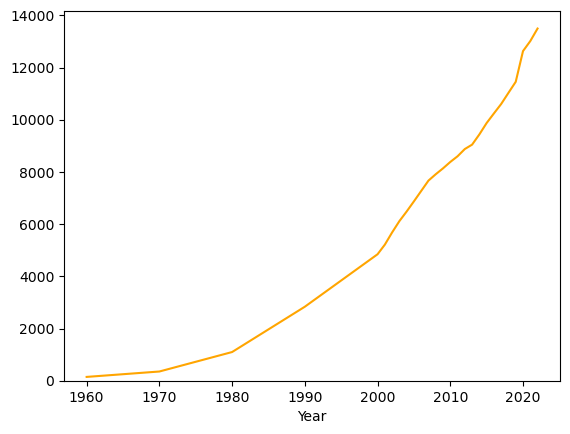

In [225]:
nhe_df1_r4.plot(y='NH Expenditure', x ='Year',color='orange', legend=False)
plt.ylim(bottom=0)

In [226]:
#gdp_2020.boxplot('GDP_Per_Capita')

<Axes: xlabel='Year'>

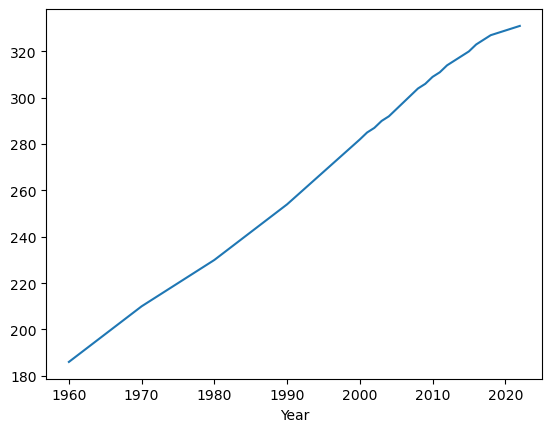

In [227]:
#count_year.sort_values('Year').plot(x='Year')
#nhe_df1_r3=nhe_df1_r2[['GDP', 'Year']].plot(x='Year',color = 'lightblue',legend=False)
nhe_df1_r2.sort_values('US_Population').plot(y='US_Population', x ='Year', legend = False)
#plt.ylim(bottom=0)

In [228]:
#gdp_decades=gdp_df[gdp_df['Year'].isin([1960, 1970, 1980, 1990, 2000, 2010, 2020])]
#gdp_decades
nhe_df1_r2_decades=nhe_df1_r2[nhe_df1_r2['Year'].isin([1960, 1970, 1980, 1990, 2000, 2010, 2020])]
nhe_df1_r2_decades=nhe_df1_r2_decades.rename(columns={'US_Population':'US Population','GDP_Percent':'GDP Percent'})
nhe_df1_r2_decades

NHE,Year,US Population,GDP,GDP Percent
0,1960,186,542.4,5.0
1,1970,210,"1,073.3",6.9
2,1980,230,"2,857.3",8.9
3,1990,254,"5,963.1",12.1
4,2000,282,"10,251.0",13.3
14,2010,309,"15,049.0",17.2
24,2020,329,"21,323.0",19.5


In [229]:
#nhe_df1_r2_decades.boxplot(x='Year', y='GDP')

<Axes: title={'center': 'US Population'}, xlabel='Year'>

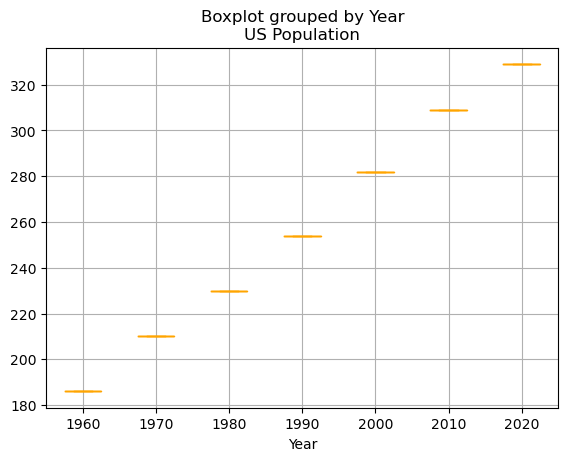

In [230]:
nhe_df1_r2_decades.boxplot('US Population','Year',color='orange')

In [231]:
#NHE: expenditures 
#count_year.sort_values('Year').plot(x='Year')
#nhe_df1_r3=nhe_df1_r2[['Year', 'GDP']].plot(x='GDP',color = 'lightblue')
#nhe_df1_r3
#nhe_df1_r3=nhe_df1_r2[['GDP', 'Year']].plot(x='Year',color = 'lightblue')
#nhe_df1_r3

In [232]:
#gdp_2020.hist('GDP_Per_Capita')
#gdp_2020.boxplot('GDP_Per_Capita')
#nhe_df1_r2_decades.boxplot('US_Population','Year')
#nhe_df1_r3.boxplot('Year')

In [233]:
(nhe_df1_r2).dtypes

NHE
Year              int64
US_Population     int64
GDP              object
GDP_Percent      object
dtype: object

In [234]:
nhe_df1_r2.GDP=nhe_df1_r2.GDP.str.replace(',','') #.astype(float)

In [235]:
nhe_df1_r2

NHE,Year,US_Population,GDP,GDP_Percent
0,1960,186,542.4,5.0
1,1970,210,1073.3,6.9
2,1980,230,2857.3,8.9
3,1990,254,5963.1,12.1
4,2000,282,10251.0,13.3
5,2001,285,10581.9,14.0
6,2002,287,10929.1,14.9
7,2003,290,11456.5,15.5
8,2004,292,12217.2,15.5
9,2005,295,13039.2,15.5


In [236]:
nhe_df1_r2.GDP= nhe_df1_r2.GDP.astype(float)
nhe_df1_r2

NHE,Year,US_Population,GDP,GDP_Percent
0,1960,186,542.4,5.0
1,1970,210,1073.3,6.9
2,1980,230,2857.3,8.9
3,1990,254,5963.1,12.1
4,2000,282,10251.0,13.3
5,2001,285,10581.9,14.0
6,2002,287,10929.1,14.9
7,2003,290,11456.5,15.5
8,2004,292,12217.2,15.5
9,2005,295,13039.2,15.5


(0.0, 27004.184999999998)

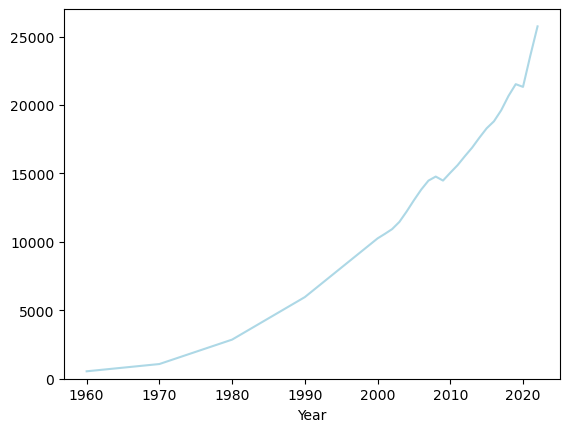

In [237]:
nhe_df1_r3=nhe_df1_r2[['GDP','Year']].plot(x='Year',color = 'lightblue',legend=False)
nhe_df1_r3
plt.ylim(bottom=0)

In [238]:
nhe_df1_r0=nhe_df1_r[['Year','National Health Expenditures as a Percent of \n  Gross Domestic Product']]
nhe_df1_r0=nhe_df1_r0.rename(columns={'National Health Expenditures as a Percent of \n  Gross Domestic Product':'NHE_Percent'})
nhe_df1_r0.columns

Index(['Year', 'NHE_Percent'], dtype='object', name='NHE')

In [239]:
nhe_df1_r0.Year=nhe_df1_r0.Year.astype(int)
nhe_df1_r0.NHE_Percent=nhe_df1_r0.NHE_Percent.astype(float)
nhe_df1_r0=nhe_df1_r0.rename(columns={'NHE_Percent':'NHE Percent'})
nhe_df1_r0

NHE,Year,NHE Percent
0,1960,5.0
1,1970,6.9
2,1980,8.9
3,1990,12.1
4,2000,13.3
5,2001,14.0
6,2002,14.9
7,2003,15.5
8,2004,15.5
9,2005,15.5


<Axes: xlabel='Year'>

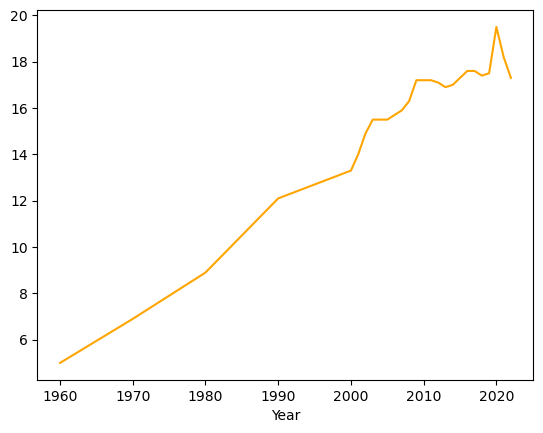

In [240]:
nhe_df1_r0.plot(x='Year',color='orange',legend=False)
#plt.xlim(bottom=0)

<Axes: >

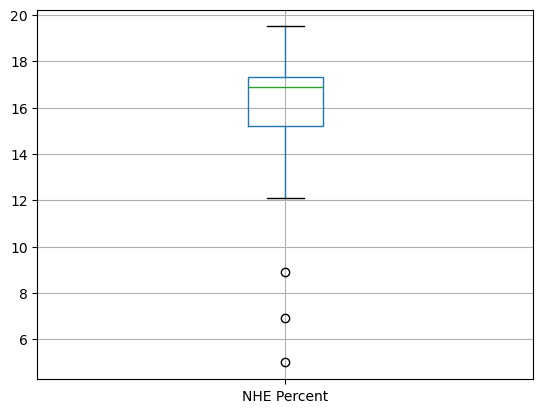

In [241]:
nhe_df1_r0.boxplot('NHE Percent')

In [242]:
nhe_df1_r0.describe().round(2)

NHE,Year,NHE Percent
count,27.00,27.00
mean,2005.67,15.35
std,15.10,3.45
min,1960.00,5.00
25%,2002.50,15.20
50%,2009.00,16.90
75%,2015.50,17.30
max,2022.00,19.50


In [243]:
pd.set_option('display.max.columns', 21)
pd.set_option('display.max.rows', 28)

Q3:Note for myself: “In 2022-2023, the number of students ages 3–21 who received special education services under the Individuals with Disabilities Education Act (IDEA) was 7.2 million, or 15 percent of all public school students. Among students receiving special education services, the most common category of disability was specific learning disabilities (32 percent).” Is there a correlation with the first data (diabetes versus learning diabilities)?

Note for myself: 
“In 2020–21, the number of students ages 3–21 who received special education services under the Individuals with Disabilities Education Act (IDEA) was 7.2 million, or 15 percent of all public school students. Among students receiving special education services, the most common category of disability was specific learning disabilities (33 percent).”
Is there a correlation with the first data (diabetes versus learning diabilities)?


In [244]:
kids_df = pd.read_csv('../data/kids_2022.csv')
kids_df.head()

,Extraction Date:,8/30/2023,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,Updated:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Revised:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Year,State Name,SEA Education Environment,SEA Disability Category,Age 3,Age 4,Age 5 (Early Childhood),American Indian or Alaska Native - Early Child...,Asian - Early Childhood,Black or African American - Early Childhood,...,EL No - School Age,Female - School Age,Male - School Age,American Indian or Alaska Native - School Age,Asian - School Age,Black or African American - School Age,Hispanic/Latino - School Age,Native Hawaiian or Other Pacific Islander - Sc...,Two or more races - School Age,White - School Age
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,-,-,...,26,2,24,0,0,21,1,0,0,4


In [245]:
kids_df=kids_df.dropna()
kids_df.head()

,Extraction Date:,8/30/2023,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
3,Year,State Name,SEA Education Environment,SEA Disability Category,Age 3,Age 4,Age 5 (Early Childhood),American Indian or Alaska Native - Early Child...,Asian - Early Childhood,Black or African American - Early Childhood,...,EL No - School Age,Female - School Age,Male - School Age,American Indian or Alaska Native - School Age,Asian - School Age,Black or African American - School Age,Hispanic/Latino - School Age,Native Hawaiian or Other Pacific Islander - Sc...,Two or more races - School Age,White - School Age
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,-,-,...,26,2,24,0,0,21,1,0,0,4
5,2022,Alabama,Home,All Disabilities,52,60,6,1,1,21,...,-,-,-,-,-,-,-,-,-,-
6,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,-,-,...,409,151,268,1,9,165,26,0,10,208
7,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,-,-,...,6032,2004,4332,33,79,2497,502,5,235,2985


In [246]:
kids_df['Unnamed: 2'].value_counts()

Unnamed: 2
Correctional Facilities                                                                        854
Home                                                                                           854
Homebound/Hospital                                                                             854
Inside regular class 40% through 79% of the day                                                854
Separate School, School Age                                                                    854
Inside regular class 80% or more of the day                                                    854
Inside regular class less than 40% of the day                                                  854
Parentally Placed in Private Schools                                                           854
Residential Facility, Early Childhood                                                          854
Residential Facility, School Age                                                               854

In [247]:
pd.set_option('display.max.columns', 53)
#pd.set_option('display.max.rows', 22)

In [248]:
kids_df1=kids_df.drop(columns=['Unnamed: 4','Unnamed: 5','Unnamed: 6', 'Unnamed: 7','Unnamed: 8',
                               'Unnamed: 9','Unnamed: 10','Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 6',  'Unnamed: 16',
                               'Unnamed: 19', 'Unnamed: 20','Unnamed: 21','Unnamed: 22', 'Unnamed: 23','Unnamed: 24','Unnamed: 25',
                               'Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32',
                               'Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 42',
                               'Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48',
                               'Unnamed: 49','Unnamed: 50','Unnamed: 51','Unnamed: 52',])
kids_df1.head(2)

,Extraction Date:,8/30/2023,Unnamed: 2,Unnamed: 3,Unnamed: 14,Unnamed: 15,Unnamed: 17,Unnamed: 18,Unnamed: 39,Unnamed: 40,Unnamed: 41
3,Year,State Name,SEA Education Environment,SEA Disability Category,Female - Early Childhood,Male - Early Childhood,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26


In [249]:
kids_df1=kids_df1.rename(columns = { 'Unnamed: 2':'Place','Extraction Date:':'Year','8/30/2023':'State','Unnamed: 3':'Category','Unnamed: 14':'Early Childhood F',
                                    'Unnamed: 15':'Early Childhood M','Unnamed: 17':'EL No - Early Childhood',
                                    'Unnamed: 18':'Age 3 to 5 (Early Childhood)','Unnamed: 39':'Age 18-21', 
                                    'Unnamed: 40': 'Age 5 (School Age)-21','Unnamed: 41':'Ages 6-21'}) 
kids_df1.head(2)


,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
3,Year,State Name,SEA Education Environment,SEA Disability Category,Female - Early Childhood,Male - Early Childhood,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26


In [250]:
#candy_df_top_state = candy_df.loc[candy_df['Name']=='Hawaii']
#candy_df_top_state
kids_df1_Iowa = kids_df1.loc[kids_df1['State'] == 'Iowa']
kids_df1_Iowa

#pd.set_option('display.max.columns', 22)
#pd.set_option('display.max.rows', 267)


,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
5058,2022,Iowa,Correctional Facilities,All Disabilities,-,-,-,-,45,223,223
5059,2022,Iowa,Home,All Disabilities,9,22,30,31,-,-,-
5060,2022,Iowa,Homebound/Hospital,All Disabilities,-,-,-,-,1,15,15
5061,2022,Iowa,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,548,10609,10455
5062,2022,Iowa,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,1243,49857,47413
...,...,...,...,...,...,...,...,...,...,...,...
5319,2022,Iowa,Services in Other Location than Regular Early ...,Visual impairment,-,-,-,*,-,-,-
5320,2022,Iowa,Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,*,-,-,-
5321,2022,Iowa,Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,*,-,-,-
5322,2022,Iowa,"Total, Early Childhood",Visual impairment,-,-,-,*,-,-,-


In [251]:
kids_df1.shape

(16227, 11)

In [252]:
kids_df1 = kids_df1.reset_index(drop=True)
kids_df1

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,Year,State Name,SEA Education Environment,SEA Disability Category,Female - Early Childhood,Male - Early Childhood,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
1,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
2,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
3,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
4,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
...,...,...,...,...,...,...,...,...,...,...,...
16222,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,41,-,-,-
16223,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,474,-,-,-
16224,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,65,-,-,-
16225,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,-,-,-,1380,-,-,-


In [253]:
kids_df1 = kids_df1.drop(0)
kids_df1.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
1,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
2,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
3,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
4,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
5,2022,Alabama,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,2991,78723,75905


In [254]:
kids_df1.columns

Index(['Year', 'State', 'Place', 'Category', 'Early Childhood F',
       'Early Childhood M', 'EL No - Early Childhood',
       'Age 3 to 5 (Early Childhood)', 'Age 18-21', 'Age 5 (School Age)-21',
       'Ages 6-21'],
      dtype='object')

In [255]:
#kids_df1['Category']= kids_df1['Category'].astype(int)
#kids_df1

In [256]:
kids_df1.shape

(16226, 11)

In [257]:
kids_df1.Category.value_counts()

Category
All Disabilities                 1159
Autism                           1159
Deaf-blindness                   1159
Developmental delay              1159
Emotional disturbance            1159
Hearing impairment               1159
Intellectual disability          1159
Multiple disabilities            1159
Orthopedic impairment            1159
Other health impairment          1159
Specific learning disability     1159
Speech or language impairment    1159
Traumatic brain injury           1159
Visual impairment                1159
Name: count, dtype: int64

In [258]:
#candy_df_by_state = candy_df[['Name', 'Total_pounds']].sort_values(by='Total_pounds',ascending=False)
#candy_df_by_state

In [259]:
type(kids_df1)

pandas.core.frame.DataFrame

In [260]:
#pd1.type=="Movie"
kids_df1.Category== 'Specific learning disability'

1        False
2        False
3        False
4        False
5        False
         ...  
16222    False
16223    False
16224    False
16225    False
16226    False
Name: Category, Length: 16226, dtype: bool

In [261]:
#pd1.loc[pd1['type']== 'Movie']
kids_df1_LD = kids_df1.loc[kids_df1['Category']=='Specific learning disability'].reset_index(drop=True)
kids_df1_LD.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,Correctional Facilities,Specific learning disability,-,-,-,-,15,19,-
1,2022,Alabama,Home,Specific learning disability,-,-,-,0,-,-,-
2,2022,Alabama,Homebound/Hospital,Specific learning disability,-,-,-,-,13,69,-
3,2022,Alabama,Inside regular class 40% through 79% of the day,Specific learning disability,-,-,-,-,52,1335,-
4,2022,Alabama,Inside regular class 80% or more of the day,Specific learning disability,-,-,-,-,1958,38043,-


In [262]:
kids_df1_LD=kids_df1_LD.rename(columns ={'Age 5 (School Age)-21':'Age 5-21'})
kids_df1_LD.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5-21,Ages 6-21
0,2022,Alabama,Correctional Facilities,Specific learning disability,-,-,-,-,15,19,-
1,2022,Alabama,Home,Specific learning disability,-,-,-,0,-,-,-
2,2022,Alabama,Homebound/Hospital,Specific learning disability,-,-,-,-,13,69,-
3,2022,Alabama,Inside regular class 40% through 79% of the day,Specific learning disability,-,-,-,-,52,1335,-
4,2022,Alabama,Inside regular class 80% or more of the day,Specific learning disability,-,-,-,-,1958,38043,-


In [263]:
pd.set_option('display.max.columns', 11)
#pd.set_option('display.max.rows', 1160)

In [264]:
#movies_released = movies_df.loc[movies_df.rating=='G'].groupby(['release_year']).title.count().sort_values(ascending=False).head()
#movies_released
kids_df2_LD = kids_df1_LD.Place.value_counts().to_frame().reset_index()
kids_df2_LD

,Place,count
0,Correctional Facilities,61
1,Home,61
2,Homebound/Hospital,61
3,Inside regular class 40% through 79% of the day,61
4,Inside regular class 80% or more of the day,61
5,Inside regular class less than 40% of the day,61
6,Parentally Placed in Private Schools,61
7,"Residential Facility, Early Childhood",61
8,"Residential Facility, School Age",61
9,Separate Class,61


In [265]:
kids_df1_Total = kids_df1.loc[kids_df1['Place']=='Total, School Age'].reset_index(drop=True)
kids_df1_Total.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,"Total, School Age",All Disabilities,-,-,-,-,4482,95252,91686
1,2022,Alabama,"Total, School Age",Autism,-,-,-,-,-,10185,-
2,2022,Alabama,"Total, School Age",Deaf-blindness,-,-,-,-,-,14,-
3,2022,Alabama,"Total, School Age",Developmental delay,-,-,-,-,-,3927,-
4,2022,Alabama,"Total, School Age",Emotional disturbance,-,-,-,-,-,1127,-


In [266]:
kids_df1_Total.shape

(854, 11)

In [267]:
kids_df1_Total_by_State = kids_df1_Total.loc[kids_df1_Total['Category']=='Specific learning disability'].reset_index(drop=True)
kids_df1_Total_by_State.head()


,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,"Total, School Age",Specific learning disability,-,-,-,-,-,39755,-
1,2022,Alaska,"Total, School Age",Specific learning disability,-,-,-,-,-,6959,-
2,2022,American Samoa,"Total, School Age",Specific learning disability,-,-,-,-,-,355,-
3,2022,Arizona,"Total, School Age",Specific learning disability,-,-,-,-,-,55145,-
4,2022,Arkansas,"Total, School Age",Specific learning disability,-,-,-,-,-,20179,-


Note to myself: Start making a graph with specific numbers to how Specific Learning Disability by State

In [268]:
kids_df1_Total_by_State.columns

Index(['Year', 'State', 'Place', 'Category', 'Early Childhood F',
       'Early Childhood M', 'EL No - Early Childhood',
       'Age 3 to 5 (Early Childhood)', 'Age 18-21', 'Age 5 (School Age)-21',
       'Ages 6-21'],
      dtype='object')

In [269]:
##candy_df = candy_df.drop(columns=['Unnamed: 0'])
##candy_df_by_state = candy_df[['Name', 'Total_pounds']].sort_values(by='Total_pounds',ascending=False)
##candy_df_by_state

kids_df1_Total_by_State=kids_df1_Total_by_State[['State', 'Age 5 (School Age)-21']]
kids_df1_Total_by_State


,State,Age 5 (School Age)-21
0,Alabama,39755
1,Alaska,6959
2,American Samoa,355
3,Arizona,55145
4,Arkansas,20179
...,...,...
56,Washington,44716
57,West Virginia,15548
58,Wisconsin,25168
59,Wyoming,4473


In [270]:
#candy_df=candy_df.rename(columns={'name':'Name'})
kids_df1_Total_by_State=kids_df1_Total_by_State.rename(columns={'Age 5 (School Age)-21':'School Age:(5-21)'})
kids_df1_Total_by_State

,State,School Age:(5-21)
0,Alabama,39755
1,Alaska,6959
2,American Samoa,355
3,Arizona,55145
4,Arkansas,20179
...,...,...
56,Washington,44716
57,West Virginia,15548
58,Wisconsin,25168
59,Wyoming,4473


In [271]:
#pd.set_option('display.max.columns', 22)
pd.set_option('display.max.rows', 61)

Iowa does not have data on Learning Disabilities or any other categories... 

In [272]:
kids_df1_Iowa = kids_df1.loc[kids_df1['State'] == 'Iowa']
kids_df1_Iowa.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
5055,2022,Iowa,Correctional Facilities,All Disabilities,-,-,-,-,45,223,223
5056,2022,Iowa,Home,All Disabilities,9,22,30,31,-,-,-
5057,2022,Iowa,Homebound/Hospital,All Disabilities,-,-,-,-,1,15,15
5058,2022,Iowa,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,548,10609,10455
5059,2022,Iowa,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,1243,49857,47413


In [273]:
kids_df1_Total_by_State.shape

(61, 2)

In [274]:
kids_df1_Total_by_State.head()

,State,School Age:(5-21)
0,Alabama,39755
1,Alaska,6959
2,American Samoa,355
3,Arizona,55145
4,Arkansas,20179


In [275]:
#(No Iowa)

kids_df1_Total_by_State=kids_df1_Total_by_State.drop(19)
kids_df1_Total_by_State.head()

,State,School Age:(5-21)
0,Alabama,39755
1,Alaska,6959
2,American Samoa,355
3,Arizona,55145
4,Arkansas,20179


In [276]:
kids_df1_Total_by_State.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 60
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              60 non-null     object
 1   School Age:(5-21)  60 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


I need to create a heat map from this DF below:

In [277]:

kids_df1_Total_by_State['School Age:(5-21)']=kids_df1_Total_by_State['School Age:(5-21)'].astype(int) #.sort_values(by='School Age:(5-21)',ascending = False)
kids_df1_Total_by_State.info()


<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 60
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              60 non-null     object
 1   School Age:(5-21)  60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [278]:
type(kids_df1_Total_by_State)


pandas.core.frame.DataFrame

In [279]:
kids_by_State_org=kids_df1_Total_by_State.sort_values(by='School Age:(5-21)', ascending = False).reset_index(drop = True)
kids_by_State_org=kids_by_State_org.drop(0)

In [280]:
combined_pd_kids= pd.merge(better_health_df1_population_by_State, kids_by_State_org,
                         left_on ='State',right_on ='State',
                         how = 'inner')
combined_pd_kids.head(10)

,State,Population,School Age:(5-21)
0,California,39029342,279110
1,Texas,30029572,236399
2,Florida,22244823,161636
3,New York,19677151,149138
4,Pennsylvania,12972008,124750
5,Illinois,12582032,94712
6,Ohio,11756058,96461
7,Georgia,10912876,79403
8,North Carolina,10698973,69384
9,Michigan,10034113,54343


In [281]:
combined_pd_kids['Per_capita'] = (combined_pd_kids['School Age:(5-21)']/combined_pd_kids.Population) 
combined_pd_kids
combined_pd_kids.sort_values(by="Per_capita", ascending = False).reset_index(drop = True).head(10)

,State,Population,School Age:(5-21),Per_capita
0,New Mexico,2113344,25254,0.011950
1,Delaware,1018396,10787,0.010592
2,Utah,3380800,35167,0.010402
3,Pennsylvania,12972008,124750,0.009617
4,Alaska,733583,6959,0.009486
5,Oklahoma,4019800,37532,0.009337
6,Kansas,2937150,26752,0.009108
7,West Virginia,1775156,15548,0.008759
8,Connecticut,3626205,31080,0.008571
9,Nebraska,1967923,16601,0.008436


In [282]:
combined_pd_kids['State Total']=round((combined_pd_kids['School Age:(5-21)']/combined_pd_kids.Population)*100000,2)
combined_pd_kids= combined_pd_kids.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_kids.head(10)

,State,Population,School Age:(5-21),Per_capita,State Total
0,New Mexico,2113344,25254,0.011950,1194.98
1,Delaware,1018396,10787,0.010592,1059.21
2,Utah,3380800,35167,0.010402,1040.20
3,Pennsylvania,12972008,124750,0.009617,961.69
4,Alaska,733583,6959,0.009486,948.63
5,Oklahoma,4019800,37532,0.009337,933.68
6,Kansas,2937150,26752,0.009108,910.81
7,West Virginia,1775156,15548,0.008759,875.87
8,Connecticut,3626205,31080,0.008571,857.09
9,Nebraska,1967923,16601,0.008436,843.58


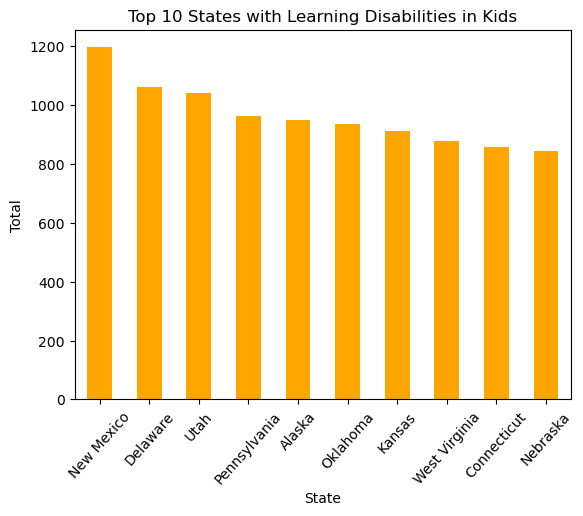

In [283]:
combined_pd_kids.head(10).plot.bar(x= 'State', y='State Total', color=['orange'], legend = False)
plt.title('Top 10 States with Learning Disabilities in Kids')
plt.ylabel ('Total') 
plt.xticks(rotation = 48)
plt.ticklabel_format(style='plain', axis='y')


In [284]:
combined_pd_kids.head()

,State,Population,School Age:(5-21),Per_capita,State Total
0,New Mexico,2113344,25254,0.011950,1194.98
1,Delaware,1018396,10787,0.010592,1059.21
2,Utah,3380800,35167,0.010402,1040.20
3,Pennsylvania,12972008,124750,0.009617,961.69
4,Alaska,733583,6959,0.009486,948.63


In [285]:
combined_pd_kids.to_csv('../data/combined_pd_kids.csv')


In [286]:
kids_df1_Category_Count=kids_df1_Total.Category.value_counts().to_frame().reset_index()
kids_df1_Category_Count

,Category,count
0,All Disabilities,61
1,Autism,61
2,Deaf-blindness,61
3,Developmental delay,61
4,Emotional disturbance,61
5,Hearing impairment,61
6,Intellectual disability,61
7,Multiple disabilities,61
8,Orthopedic impairment,61
9,Other health impairment,61


In [287]:
kids_df1_Total[['State','Place','Category', 'Age 5 (School Age)-21']].groupby('Category').value_counts().to_frame().reset_index().head()

,Category,State,Place,Age 5 (School Age)-21,count
0,All Disabilities,Alabama,"Total, School Age",95252,1
1,All Disabilities,Alaska,"Total, School Age",18265,1
2,All Disabilities,American Samoa,"Total, School Age",437,1
3,All Disabilities,Arizona,"Total, School Age",140987,1
4,All Disabilities,Arkansas,"Total, School Age",70301,1


In [288]:
kids_df1_Total.Category=kids_df1_Total.Category.astype(str)
kids_df1_Total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Year                          854 non-null    object
 1   State                         854 non-null    object
 2   Place                         854 non-null    object
 3   Category                      854 non-null    object
 4   Early Childhood F             854 non-null    object
 5   Early Childhood M             854 non-null    object
 6   EL No - Early Childhood       854 non-null    object
 7   Age 3 to 5 (Early Childhood)  854 non-null    object
 8   Age 18-21                     854 non-null    object
 9   Age 5 (School Age)-21         854 non-null    object
 10  Ages 6-21                     854 non-null    object
dtypes: object(11)
memory usage: 73.5+ KB


In [289]:

kids_df1[['State','Category']].groupby('State')['Category'].value_counts().to_frame().sort_values(by='Category', ascending = False).reset_index().drop(0).head(10)


,State,Category,count
1,Virginia,Visual impairment,19
2,California,Visual impairment,19
3,Illinois,Visual impairment,19
4,Northern Marianas,Visual impairment,19
5,Indiana,Visual impairment,19
6,North Dakota,Visual impairment,19
7,Utah,Visual impairment,19
8,Bureau of Indian Education,Visual impairment,19
9,Rhode Island,Visual impairment,19
10,North Carolina,Visual impairment,19


In [290]:
kids_df1.head(2)

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
1,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
2,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-


In [291]:
kids_df1=kids_df1.reset_index(drop=True)
kids_df1.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
1,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
2,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
3,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
4,2022,Alabama,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,2991,78723,75905


In [292]:
type(kids_df1)

pandas.core.frame.DataFrame

In [293]:
type(nhe_df1_r)

pandas.core.frame.DataFrame

In [294]:
kids_df1['Category'].value_counts()

Category
All Disabilities                 1159
Autism                           1159
Deaf-blindness                   1159
Developmental delay              1159
Emotional disturbance            1159
Hearing impairment               1159
Intellectual disability          1159
Multiple disabilities            1159
Orthopedic impairment            1159
Other health impairment          1159
Specific learning disability     1159
Speech or language impairment    1159
Traumatic brain injury           1159
Visual impairment                1159
Name: count, dtype: int64

In [295]:
better_health_df1_Diabetes

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None,39994506
1,17.5,Diabetes,Alabama,2022,AL,Russell,Health Outcomes,58555,POINT (-85.18466 32.28821),10247
2,15.3,Diabetes,Arkansas,2022,AR,Drew,Health Outcomes,16911,POINT (-91.71966 33.58941),2587
3,15.8,Diabetes,Georgia,2022,GA,Burke,Health Outcomes,24388,POINT (-82.00069 33.06134),3853
4,13.7,Diabetes,Georgia,2022,GA,Glascock,Health Outcomes,2939,POINT (-82.61063 33.22973),402
...,...,...,...,...,...,...,...,...,...,...
3140,11.5,Diabetes,Wisconsin,2022,WI,Sauk,Health Outcomes,65777,POINT (-89.94806 43.42688),7564
3141,12.5,Diabetes,Wisconsin,2022,WI,Taylor,Health Outcomes,19975,POINT (-90.50146 45.21145),2496
3142,10.7,Diabetes,Wyoming,2022,WY,Natrona,Health Outcomes,79601,POINT (-106.79843 42.96244),8517
3143,12.3,Diabetes,Wyoming,2022,WY,Washakie,Health Outcomes,7719,POINT (-107.68261 43.90446),949


In [296]:
combined_pd_Diabetes

,State,Population,Total,Per_capita,State Total
0,Texas,30029572,4096814,0.136426,13642.60
1,Ohio,11756058,1577087,0.134151,13415.10
2,Florida,22244823,2964747,0.133278,13327.81
3,Georgia,10912876,1374933,0.125992,12599.18
4,North Carolina,10698973,1280957,0.119727,11972.71
5,Illinois,12582032,1480750,0.117688,11768.77
6,Pennsylvania,12972008,1500161,0.115646,11564.60
7,California,39029342,4484266,0.114895,11489.47
8,Michigan,10034113,1134922,0.113106,11310.64
9,New York,19677151,2191458,0.111371,11137.07


In [297]:
combined_pd_Stroke.sort_values(by="Per_capita", ascending = False).reset_index(drop = True).head()

,State,Population,Total,Per_capita,State Total
0,Mississippi,2940057,137409,0.046737,4673.68
1,Louisiana,4590241,204770,0.044610,4460.99
2,West Virginia,1775156,79184,0.044607,4460.68
3,Alabama,5074296,215914,0.042551,4255.05
4,Arkansas,3045637,129431,0.042497,4249.72


In [298]:
better_health_df1_population_by_State.head()

,State,Population
0,United States,333287557
1,California,39029342
2,Texas,30029572
3,Florida,22244823
4,New York,19677151


In [299]:
#movies_released = movies_df.loc[movies_df.rating=='G'].groupby(['release_year']).title.count().sort_values(ascending=False).head()
combined_pd_Current_Cigarette_Smoking_Healthy=combined_pd_Current_Cigarette_Smoking[['State','State Total']].sort_values(by='State Total',ascending = True)
combined_pd_Current_Cigarette_Smoking_Healthy.head(10)

,State,State Total
50,Utah,8044.07
49,Washington,10617.43
48,District of Columbia,11199.86
47,California,11264.05
46,New Jersey,11405.27
45,Massachusetts,11520.17
44,Maryland,11539.35
43,Hawaii,11746.32
42,Connecticut,11967.39
41,New Hampshire,12097.28


In [300]:
combined_pd_Physical_Inactivity_Healthy=combined_pd_Physical_Inactivity.sort_values(by="Per_capita", ascending = True).reset_index(drop = True).head(10)
combined_pd_Physical_Inactivity_Healthy

,State,Population,Total,Per_capita,State Total
0,District of Columbia,671803,97411,0.144999,14499.94
1,Washington,7785786,1363414,0.175116,17511.58
2,Utah,3380800,594499,0.175846,17584.57
3,Colorado,5839926,1037833,0.177713,17771.34
4,Vermont,647064,117584,0.181719,18171.93
5,New Hampshire,1395231,271455,0.194559,19455.92
6,Oregon,4240137,831903,0.196197,19619.72
7,Minnesota,5717184,1153768,0.201807,20180.70
8,Massachusetts,6981974,1479347,0.211881,21188.09
9,Virginia,8683619,1873493,0.215750,21575.03


In [301]:
combined_pd_Current_Cigarette_Smoking_Healthy=combined_pd_Current_Cigarette_Smoking.sort_values(by="Per_capita", ascending = True).reset_index(drop = True).head(10)
combined_pd_Current_Cigarette_Smoking_Healthy

,State,Population,Total,Per_capita,State Total
0,Utah,3380800,271954,0.080441,8044.07
1,Washington,7785786,826650,0.106174,10617.43
2,District of Columbia,671803,75241,0.111999,11199.86
3,California,39029342,4396283,0.112640,11264.05
4,New Jersey,9261699,1056322,0.114053,11405.27
5,Massachusetts,6981974,804335,0.115202,11520.17
6,Maryland,6164660,711362,0.115394,11539.35
7,Hawaii,1440196,169170,0.117463,11746.32
8,Connecticut,3626205,433962,0.119674,11967.39
9,New Hampshire,1395231,168785,0.120973,12097.28


In [302]:
combined_pd_Binge_Drinking_Healthy=combined_pd_Binge_Drinking.sort_values(by="Per_capita", ascending = True).reset_index(drop = True).head(10)
combined_pd_Binge_Drinking_Healthy


,State,Population,Total,Per_capita,State Total
0,Utah,3380800,457910,0.135444,13544.43
1,Mississippi,2940057,414863,0.141107,14110.71
2,Kentucky,4512310,639096,0.141634,14163.39
3,Alabama,5074296,731707,0.144199,14419.87
4,Oklahoma,4019800,585500,0.145654,14565.40
5,Maryland,6164660,907278,0.147174,14717.41
6,Delaware,1018396,152835,0.150074,15007.42
7,West Virginia,1775156,267681,0.150793,15079.29
8,Georgia,10912876,1664358,0.152513,15251.32
9,New Mexico,2113344,327217,0.154834,15483.38


In [303]:
#combined_pd = pd.merge(candy_df_by_state, population_df,
                         #left_on = "Name", right_on = 'Name',
                         #how = 'inner')
#combined_pd

combined_pd2=pd.merge(combined_pd_Current_Cigarette_Smoking_Healthy, combined_pd_Physical_Inactivity_Healthy,
                         left_on = "State", right_on = 'State',
                         how = 'inner')
combined_pd2


,State,Population_x,Total_x,Per_capita_x,State Total_x,Population_y,Total_y,Per_capita_y,State Total_y
0,Utah,3380800,271954,0.080441,8044.07,3380800,594499,0.175846,17584.57
1,Washington,7785786,826650,0.106174,10617.43,7785786,1363414,0.175116,17511.58
2,District of Columbia,671803,75241,0.111999,11199.86,671803,97411,0.144999,14499.94
3,Massachusetts,6981974,804335,0.115202,11520.17,6981974,1479347,0.211881,21188.09
4,New Hampshire,1395231,168785,0.120973,12097.28,1395231,271455,0.194559,19455.92


In [304]:
#correlation_healthier = np.corrcoef('State Total_x','State Total_y')
#print(correlation_healthier)

In [305]:
combined_pd2.to_csv('../data/combined_pd2.csv')
Healthier_states= pd.read_csv('../data/combined_pd2.csv')
Healthier_states
#Binge_Drinking2Test.to_csv('../data/Binge_Drinking2Test.csv')


,Unnamed: 0,State,Population_x,Total_x,Per_capita_x,State Total_x,Population_y,Total_y,Per_capita_y,State Total_y
0,0,Utah,3380800,271954,0.080441,8044.07,3380800,594499,0.175846,17584.57
1,1,Washington,7785786,826650,0.106174,10617.43,7785786,1363414,0.175116,17511.58
2,2,District of Columbia,671803,75241,0.111999,11199.86,671803,97411,0.144999,14499.94
3,3,Massachusetts,6981974,804335,0.115202,11520.17,6981974,1479347,0.211881,21188.09
4,4,New Hampshire,1395231,168785,0.120973,12097.28,1395231,271455,0.194559,19455.92


Healthiest state in USA is UTAH

In [306]:
Healthier_states

,Unnamed: 0,State,Population_x,Total_x,Per_capita_x,State Total_x,Population_y,Total_y,Per_capita_y,State Total_y
0,0,Utah,3380800,271954,0.080441,8044.07,3380800,594499,0.175846,17584.57
1,1,Washington,7785786,826650,0.106174,10617.43,7785786,1363414,0.175116,17511.58
2,2,District of Columbia,671803,75241,0.111999,11199.86,671803,97411,0.144999,14499.94
3,3,Massachusetts,6981974,804335,0.115202,11520.17,6981974,1479347,0.211881,21188.09
4,4,New Hampshire,1395231,168785,0.120973,12097.28,1395231,271455,0.194559,19455.92


In [307]:
Healthier_states[['State','State Total_x', 'State Total_y']]

,State,State Total_x,State Total_y
0,Utah,8044.07,17584.57
1,Washington,10617.43,17511.58
2,District of Columbia,11199.86,14499.94
3,Massachusetts,11520.17,21188.09
4,New Hampshire,12097.28,19455.92


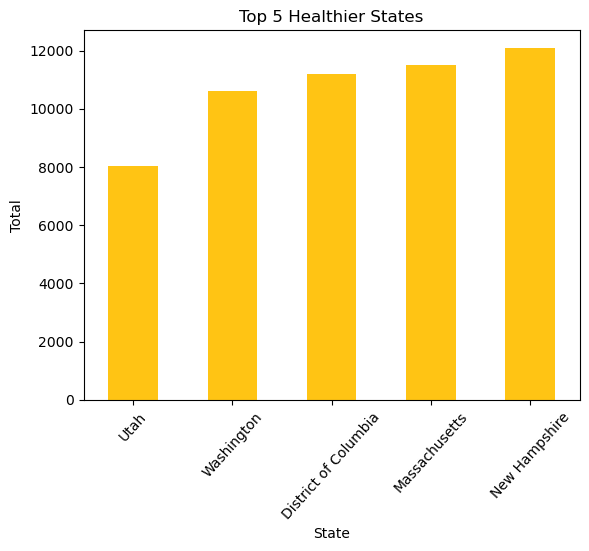

In [308]:
Healthier_states.plot.bar(x= 'State', y='State Total_x', color=['#ffc414'], legend=False)
plt.title('Top 5 Healthier States')
plt.ylabel ('Total') 
plt.xticks(rotation = 48)
plt.ticklabel_format(style='plain', axis='y')

In [309]:
Healthier_states

,Unnamed: 0,State,Population_x,Total_x,Per_capita_x,State Total_x,Population_y,Total_y,Per_capita_y,State Total_y
0,0,Utah,3380800,271954,0.080441,8044.07,3380800,594499,0.175846,17584.57
1,1,Washington,7785786,826650,0.106174,10617.43,7785786,1363414,0.175116,17511.58
2,2,District of Columbia,671803,75241,0.111999,11199.86,671803,97411,0.144999,14499.94
3,3,Massachusetts,6981974,804335,0.115202,11520.17,6981974,1479347,0.211881,21188.09
4,4,New Hampshire,1395231,168785,0.120973,12097.28,1395231,271455,0.194559,19455.92


In [310]:
combined_pd3=pd.merge(combined_pd2, combined_pd_Binge_Drinking_Healthy,
                         left_on = "State", right_on = 'State',
                         how = 'inner')
combined_pd3

,State,Population_x,Total_x,Per_capita_x,State Total_x,...,State Total_y,Population,Total,Per_capita,State Total
0,Utah,3380800,271954,0.080441,8044.07,...,17584.57,3380800,457910,0.135444,13544.43


In [311]:
combined_pd2.plot.scatter 

<bound method PlotAccessor.scatter of <pandas.plotting._core.PlotAccessor object at 0x000001B3C6CBF820>>

In [312]:
#combined_pd4=combined_pd2.drop(columns=['Name'])
#combined_pd4.head()

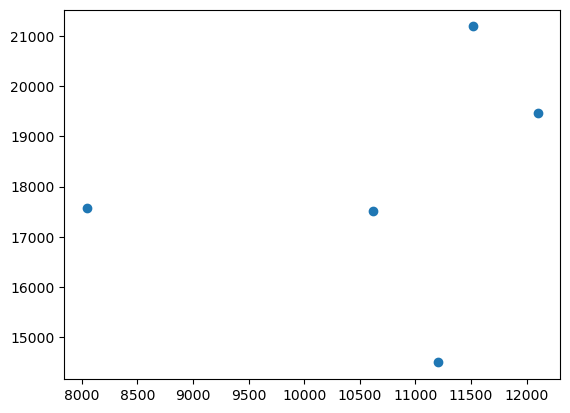

In [313]:
x=[8044.07,10617.43, 11199.86,11520.17,12097.28]
y=[17584.57,17511.58, 14499.94, 21188.09,19455.92]

plt.scatter(x,y)
plt.show()

In [314]:
combined_pd2 = np.corrcoef(x, y)
print(combined_pd2 )

[[1.         0.25695019]
 [0.25695019 1.        ]]


In [315]:
What is a correlation between cognitive disabilities & diabetes?


Object `diabetes` not found.


In [316]:
kids_df1

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
1,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
2,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
3,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
4,2022,Alabama,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,2991,78723,75905
...,...,...,...,...,...,...,...,...,...,...,...
16221,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,41,-,-,-
16222,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,474,-,-,-
16223,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,65,-,-,-
16224,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,-,-,-,1380,-,-,-


In [317]:
combined_pd_Current_Cigarette_Smoking['State Total']=round((combined_pd_Current_Cigarette_Smoking.Total/combined_pd_Current_Cigarette_Smoking.Population)*100000,2)
combined_pd_Current_Cigarette_Smoking= combined_pd_Current_Cigarette_Smoking.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Current_Cigarette_Smoking2=combined_pd_Current_Cigarette_Smoking[['State','State Total']] #.head(10)
combined_pd_Current_Cigarette_Smoking2.head(10)


,State,State Total
0,West Virginia,20168.82
1,Tennessee,19065.77
2,Louisiana,18695.60
3,Arkansas,18496.89
4,Kentucky,18482.37
5,Mississippi,18196.96
6,Missouri,17942.34
7,Ohio,17902.95
8,Indiana,17446.34
9,Oklahoma,17037.27


In [318]:
combined_pd_High_Blood_Pressure['State Total']=round((combined_pd_High_Blood_Pressure.Total/combined_pd_High_Blood_Pressure.Population)*100000,2)
combined_pd_High_Blood_Pressure= combined_pd_High_Blood_Pressure.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_High_Blood_Pressure2=combined_pd_High_Blood_Pressure[[ 'State','State Total']]
combined_pd_High_Blood_Pressure2.head(10)

,State,State Total
0,Mississippi,44110.47
1,West Virginia,42502.01
2,Alabama,41071.77
3,Louisiana,39865.99
4,Arkansas,39801.85
5,Kentucky,38812.38
6,South Carolina,37764.66
7,Tennessee,37633.28
8,Oklahoma,37618.24
9,Georgia,37440.79


In [319]:
combined=pd.merge(combined_pd_High_Blood_Pressure2, combined_pd_Current_Cigarette_Smoking2,
                         left_on = "State", right_on = 'State',
                         how = 'inner')
combined=combined #.head(10) #.rename(columns = {'State Total_x':'State Total HBP', 'State Total_y':'State Total CCS'})
combined=combined.rename(columns={'State Total_x':'High Blood Pressure', 'State Total_y':'Cigarette Smoking'})
combined

,State,High Blood Pressure,Cigarette Smoking
0,Mississippi,44110.47,18196.96
1,West Virginia,42502.01,20168.82
2,Alabama,41071.77,16493.52
3,Louisiana,39865.99,18695.60
4,Arkansas,39801.85,18496.89
5,Kentucky,38812.38,18482.37
6,South Carolina,37764.66,15038.10
7,Tennessee,37633.28,19065.77
8,Oklahoma,37618.24,17037.27
9,Georgia,37440.79,14492.08


In [320]:
combined.corr(numeric_only = True)

,High Blood Pressure,Cigarette Smoking
High Blood Pressure,1.000000,0.757317
Cigarette Smoking,0.757317,1.000000


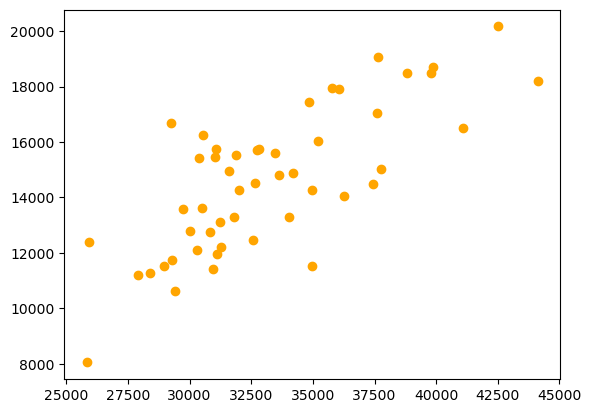

In [321]:
plt.scatter(combined['High Blood Pressure'],combined['Cigarette Smoking'], color = 'orange') #, s=combined.col3)
# OR (with pandas 0.13 and up)
#df.plot(kind='scatter', x='col1', y='col2', s=df.col3)

In [322]:
combined_pd_Cognitive_Disability['State Total']=round((combined_pd_Cognitive_Disability.Total/combined_pd_Cognitive_Disability.Population)*100000,2)
combined_pd_Cognitive_Disability2= combined_pd_Cognitive_Disability.sort_values(by="Per_capita", ascending = True).reset_index(drop = True)
combined_pd_Cognitive_Disability2.head()

,State,Population,Total,Per_capita,State Total
0,District of Columbia,671803,70539,0.105000,10499.95
1,New Jersey,9261699,1000834,0.108062,10806.16
2,Maryland,6164660,710122,0.115192,11519.24
3,Hawaii,1440196,165924,0.115209,11520.93
4,South Dakota,909824,106187,0.116712,11671.16


In [323]:
#combined_pd2.to_csv('../data/combined_pd2.csv')
#Healthier_states= pd.read_csv('../data/combined_pd2.csv')
#Healthier_states

In [324]:

combined_pd_Cancer.to_csv('../data/combined_pd_Cancer.csv')
combined_pd_Cancer=pd.read_csv('../data/combined_pd_Cancer.csv')

In [325]:
combined10=combined.head(10)
combined10

,State,High Blood Pressure,Cigarette Smoking
0,Mississippi,44110.47,18196.96
1,West Virginia,42502.01,20168.82
2,Alabama,41071.77,16493.52
3,Louisiana,39865.99,18695.60
4,Arkansas,39801.85,18496.89
5,Kentucky,38812.38,18482.37
6,South Carolina,37764.66,15038.10
7,Tennessee,37633.28,19065.77
8,Oklahoma,37618.24,17037.27
9,Georgia,37440.79,14492.08


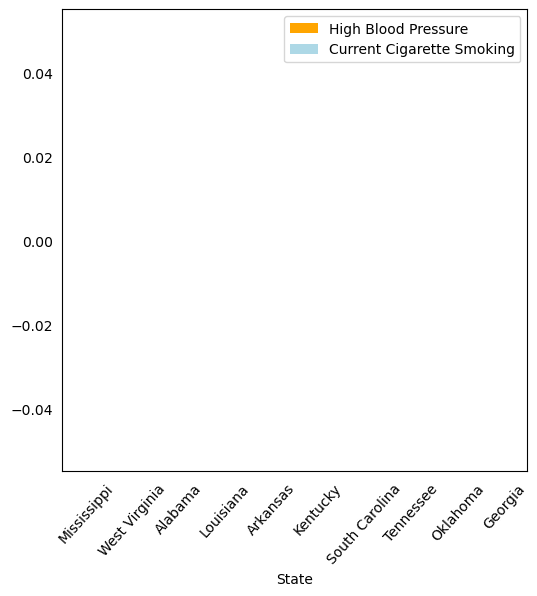

In [326]:

colors = ['orange', 'lightblue']
combined10 = pd.DataFrame(combined10, columns=['State', 'State Total_x', 'State Total_y'])
combined10.plot(x='State', y=['State Total_x', 'State Total_y'], kind = 'bar', color = colors, figsize = (6,6))
#plt.bar(color=colors)
plt.xticks(rotation = 48)
plt.tick_params(left = False, bottom = False)# Change the legend
labels_legend = ['High Blood Pressure', 'Current Cigarette Smoking']
# Displaying the legend
plt.legend(labels = labels_legend)


In [327]:
combined_pd_Cognitive_Disability['State Total']=round((combined_pd_Cognitive_Disability.Total/combined_pd_Cognitive_Disability.Population)*100000,2)
combined_pd_Cognitive_Disability= combined_pd_Cognitive_Disability.sort_values(by="Per_capita", ascending = False).reset_index(drop = True)
combined_pd_Cognitive_Disability #.head(10)

,State,Population,Total,Per_capita,State Total
0,West Virginia,1775156,327264,0.184358,18435.79
1,Louisiana,4590241,845470,0.184189,18418.86
2,Oklahoma,4019800,736159,0.183133,18313.32
3,Arkansas,3045637,534810,0.175599,17559.87
4,Kentucky,4512310,779244,0.172693,17269.29
5,Mississippi,2940057,499111,0.169762,16976.24
6,Tennessee,7051339,1188431,0.168540,16853.98
7,Alabama,5074296,822568,0.162105,16210.49
8,New Mexico,2113344,336566,0.159258,15925.76
9,Missouri,6177957,979681,0.158577,15857.69


In [328]:
combined_pd_Cognitive_Disability['State Total']=round((combined_pd_Cognitive_Disability.Total/combined_pd_Cognitive_Disability.Population)*100000,2)
combined_pd_Cognitive_Disability= combined_pd_Cognitive_Disability.sort_values(by="Per_capita", ascending = True).reset_index(drop = True)
combined_pd_Cognitive_Disability #.head(10)

,State,Population,Total,Per_capita,State Total
0,District of Columbia,671803,70539,0.105000,10499.95
1,New Jersey,9261699,1000834,0.108062,10806.16
2,Maryland,6164660,710122,0.115192,11519.24
3,Hawaii,1440196,165924,0.115209,11520.93
4,South Dakota,909824,106187,0.116712,11671.16
5,New York,19677151,2318039,0.117804,11780.36
6,Nebraska,1967923,236047,0.119947,11994.73
7,Vermont,647064,77886,0.120368,12036.83
8,Minnesota,5717184,704972,0.123308,12330.76
9,New Hampshire,1395231,173474,0.124334,12433.35


In [329]:
combined_pd_kids #.head(10)

,State,Population,School Age:(5-21),Per_capita,State Total
0,New Mexico,2113344,25254,0.011950,1194.98
1,Delaware,1018396,10787,0.010592,1059.21
2,Utah,3380800,35167,0.010402,1040.20
3,Pennsylvania,12972008,124750,0.009617,961.69
4,Alaska,733583,6959,0.009486,948.63
5,Oklahoma,4019800,37532,0.009337,933.68
6,Kansas,2937150,26752,0.009108,910.81
7,West Virginia,1775156,15548,0.008759,875.87
8,Connecticut,3626205,31080,0.008571,857.09
9,Nebraska,1967923,16601,0.008436,843.58


In [330]:
combinedK=pd.merge(combined_pd_Cognitive_Disability, combined_pd_kids,
                         left_on = "State", right_on = 'State',
                         how = 'inner')
combinedK#.head(10) #.rename(columns = {'State Total_x':'State Total HBP', 'State Total_y':'State Total CCS'})
#combinedK=combined.rename(columns={'State Total_x':'High Blood Pressure', 'State Total_y':'Cigarette Smoking'})
#combinedK

,State,Population_x,Total,Per_capita_x,State Total_x,Population_y,School Age:(5-21),Per_capita_y,State Total_y
0,District of Columbia,671803,70539,0.105000,10499.95,671803,4597,0.006843,684.28
1,New Jersey,9261699,1000834,0.108062,10806.16,9261699,71490,0.007719,771.89
2,Maryland,6164660,710122,0.115192,11519.24,6164660,29904,0.004851,485.09
3,Hawaii,1440196,165924,0.115209,11520.93,1440196,7405,0.005142,514.17
4,South Dakota,909824,106187,0.116712,11671.16,909824,7411,0.008146,814.55
5,New York,19677151,2318039,0.117804,11780.36,19677151,149138,0.007579,757.92
6,Nebraska,1967923,236047,0.119947,11994.73,1967923,16601,0.008436,843.58
7,Vermont,647064,77886,0.120368,12036.83,647064,4296,0.006639,663.92
8,Minnesota,5717184,704972,0.123308,12330.76,5717184,38621,0.006755,675.52
9,New Hampshire,1395231,173474,0.124334,12433.35,1395231,10077,0.007222,722.25


In [347]:
combinedKS1=combinedK[['State','State Total_x', 'State Total_y']].rename(columns={'State Total_x':'CD','State Total_y':'LDK'})
combinedKS1

,State,CD,LDK
0,District of Columbia,10499.95,684.28
1,New Jersey,10806.16,771.89
2,Maryland,11519.24,485.09
3,Hawaii,11520.93,514.17
4,South Dakota,11671.16,814.55
5,New York,11780.36,757.92
6,Nebraska,11994.73,843.58
7,Vermont,12036.83,663.92
8,Minnesota,12330.76,675.52
9,New Hampshire,12433.35,722.25


In [348]:
combinedKS1.corr(numeric_only = True) 

,CD,LDK
CD,1.000000,0.013539
LDK,0.013539,1.000000


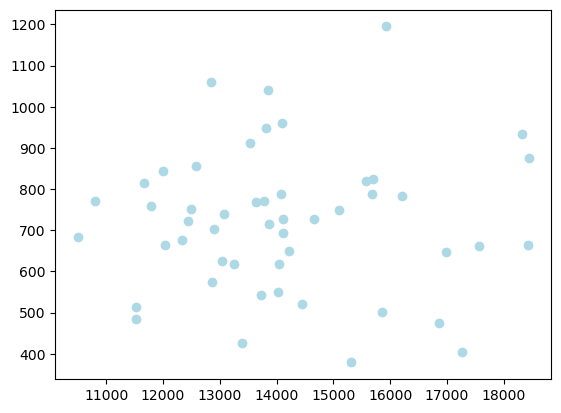

In [349]:
plt.scatter(combinedKS1['CD'],combinedKS1['LDK'], color = 'lightblue') #, s=combined.col3)
# OR (with pandas 0.13 and up)

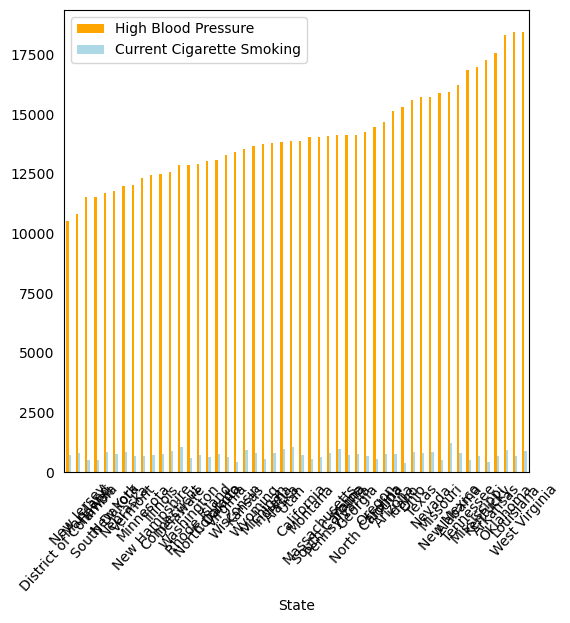

In [350]:
combinedKS1 = pd.DataFrame(combinedKS1, columns=['State', 'CD', 'LDK'])
combinedKS1.plot(x='State', y=['CD', 'LDK'], kind = 'bar', color = colors, figsize = (6,6))
#plt.bar(color=colors)
plt.xticks(rotation = 48)
plt.tick_params(left = False, bottom = False)# Change the legend
labels_legend = ['High Blood Pressure', 'Current Cigarette Smoking']
# Displaying the legend
plt.legend(labels = labels_legend)